In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import os
from pathlib import Path

# function

In [144]:
def reader(result_dir:str) -> pd.DataFrame:
    results = glob.glob(f'{result_dir}/re*.txt')
    run = Path(result_dir).stem[-1]
    result_list = [pd.read_csv(i,header=None) for i in results]
    result = pd.concat(result_list)
    result.columns = [
    "learning rate",
    "weight_decay",
    "Tmax",
    "best score",
    "best auc",
    "best avg auc",
    ]
    return result,run
        
def vis_best_metrics(results, metrics,figsize = (50, 50),output=False):
    """
    args:
        stats_df：tuple: (dataframe of result, run number)
        metrics: best auc,best score,best avg score statistical data in different settings of hyperparameter

    """
    stats_df,run = results
    labels_lr = [str(i) for i in np.sort(stats_df["learning rate"].unique())]
    labels_wd = [str(i) for i in np.sort(stats_df["weight_decay"].unique())]
    labels_Tmax = [str(i) for i in np.sort(stats_df["Tmax"].unique())]
    auc_list = []
    score_list = []
    avg_auc_list = []
    # NOTE:auc/score/avg_auc_list is wrongly named, they have no relation with names but only a recorder of metrics for different hyperparameters seperately
    fig, axes = plt.subplots(3, 1, figsize=figsize)
    for i in labels_lr:
        lr = eval(i)
        auc_list.append(stats_df[stats_df["learning rate"] == lr][metrics])
    axes[0].boxplot(auc_list, labels=labels_lr)
    axes[0].set_xlabel("learning rate")
    axes[0].set_ylabel(metrics)
    for i in labels_wd:
        wd = eval(i)
        score_list.append(stats_df[stats_df["weight_decay"] == wd][metrics])
    axes[1].boxplot(score_list, labels=labels_wd)
    axes[1].set_xlabel("weight_decay")
    axes[1].set_ylabel(metrics)
    for i in labels_Tmax:
        Tmax = eval(i)
        avg_auc_list.append(stats_df[stats_df["Tmax"] == Tmax][metrics])
    axes[2].boxplot(avg_auc_list, labels=labels_Tmax)
    axes[2].set_xlabel("Tmax")
    axes[2].set_ylabel(metrics)
    if output:
        plt.savefig(f'./mil classifier/hyperparam_select_batch_{run}/{metrics}.png')
    print(stats_df[metrics].describe())

# results for the 1st trial

In [9]:
result_ser = pd.read_csv("./mil classifier/reselts.txt", header=None)
result_ser.columns = [
    "learning rate",
    "weight_decay",
    "Tmax",
    "best score",
    "best auc",
    "best avg auc",
]
result_star = pd.read_csv("./mil classifier/reselts_star.txt", header=None)
result_star.columns = [
    "learning rate",
    "weight_decay",
    "Tmax",
    "best score",
    "best auc",
    "best avg auc",
]

In [15]:
result = pd.concat([result_ser, result_star])

In [16]:
result

learning rate  weight_decay  Tmax  best score  best auc  best avg auc
0          0.000100  1.900000e-05    50    0.839332  0.412500      1.014583
1          0.000100  1.000000e-05   200    0.968894  0.572917      1.206250
2          0.000100  2.800000e-05   200    0.840374  0.412500      1.018750
3          0.000100  2.800000e-05    50    0.839332  0.412500      1.014583
4          0.000100  1.900000e-05   100    0.840374  0.412500      1.016667
...             ...           ...   ...         ...       ...           ...
1195       0.000091  8.200000e-06   200    0.910453  0.535417      1.162500
1196       0.000064  9.100000e-07   200    0.917277  0.518750      1.116667
1197       0.000091  9.100000e-06   100    0.927694  0.545833      1.170833
1198       0.000091  9.100000e-06    50    0.957902  0.535417      1.191667
1199       0.000091  9.100000e-06   200    0.909231  0.533333      1.145833

[1800 rows x 6 columns]

In [22]:
best_auc = result[["learning rate", "weight_decay", "Tmax", "best auc"]]
best_score = result["best score"]
best_avg_auc = result["best avg auc"]

count    1800.000000
mean        0.515311
std         0.074492
min         0.410417
25%         0.418750
50%         0.537500
75%         0.568750
max         0.714583
Name: best auc, dtype: float64


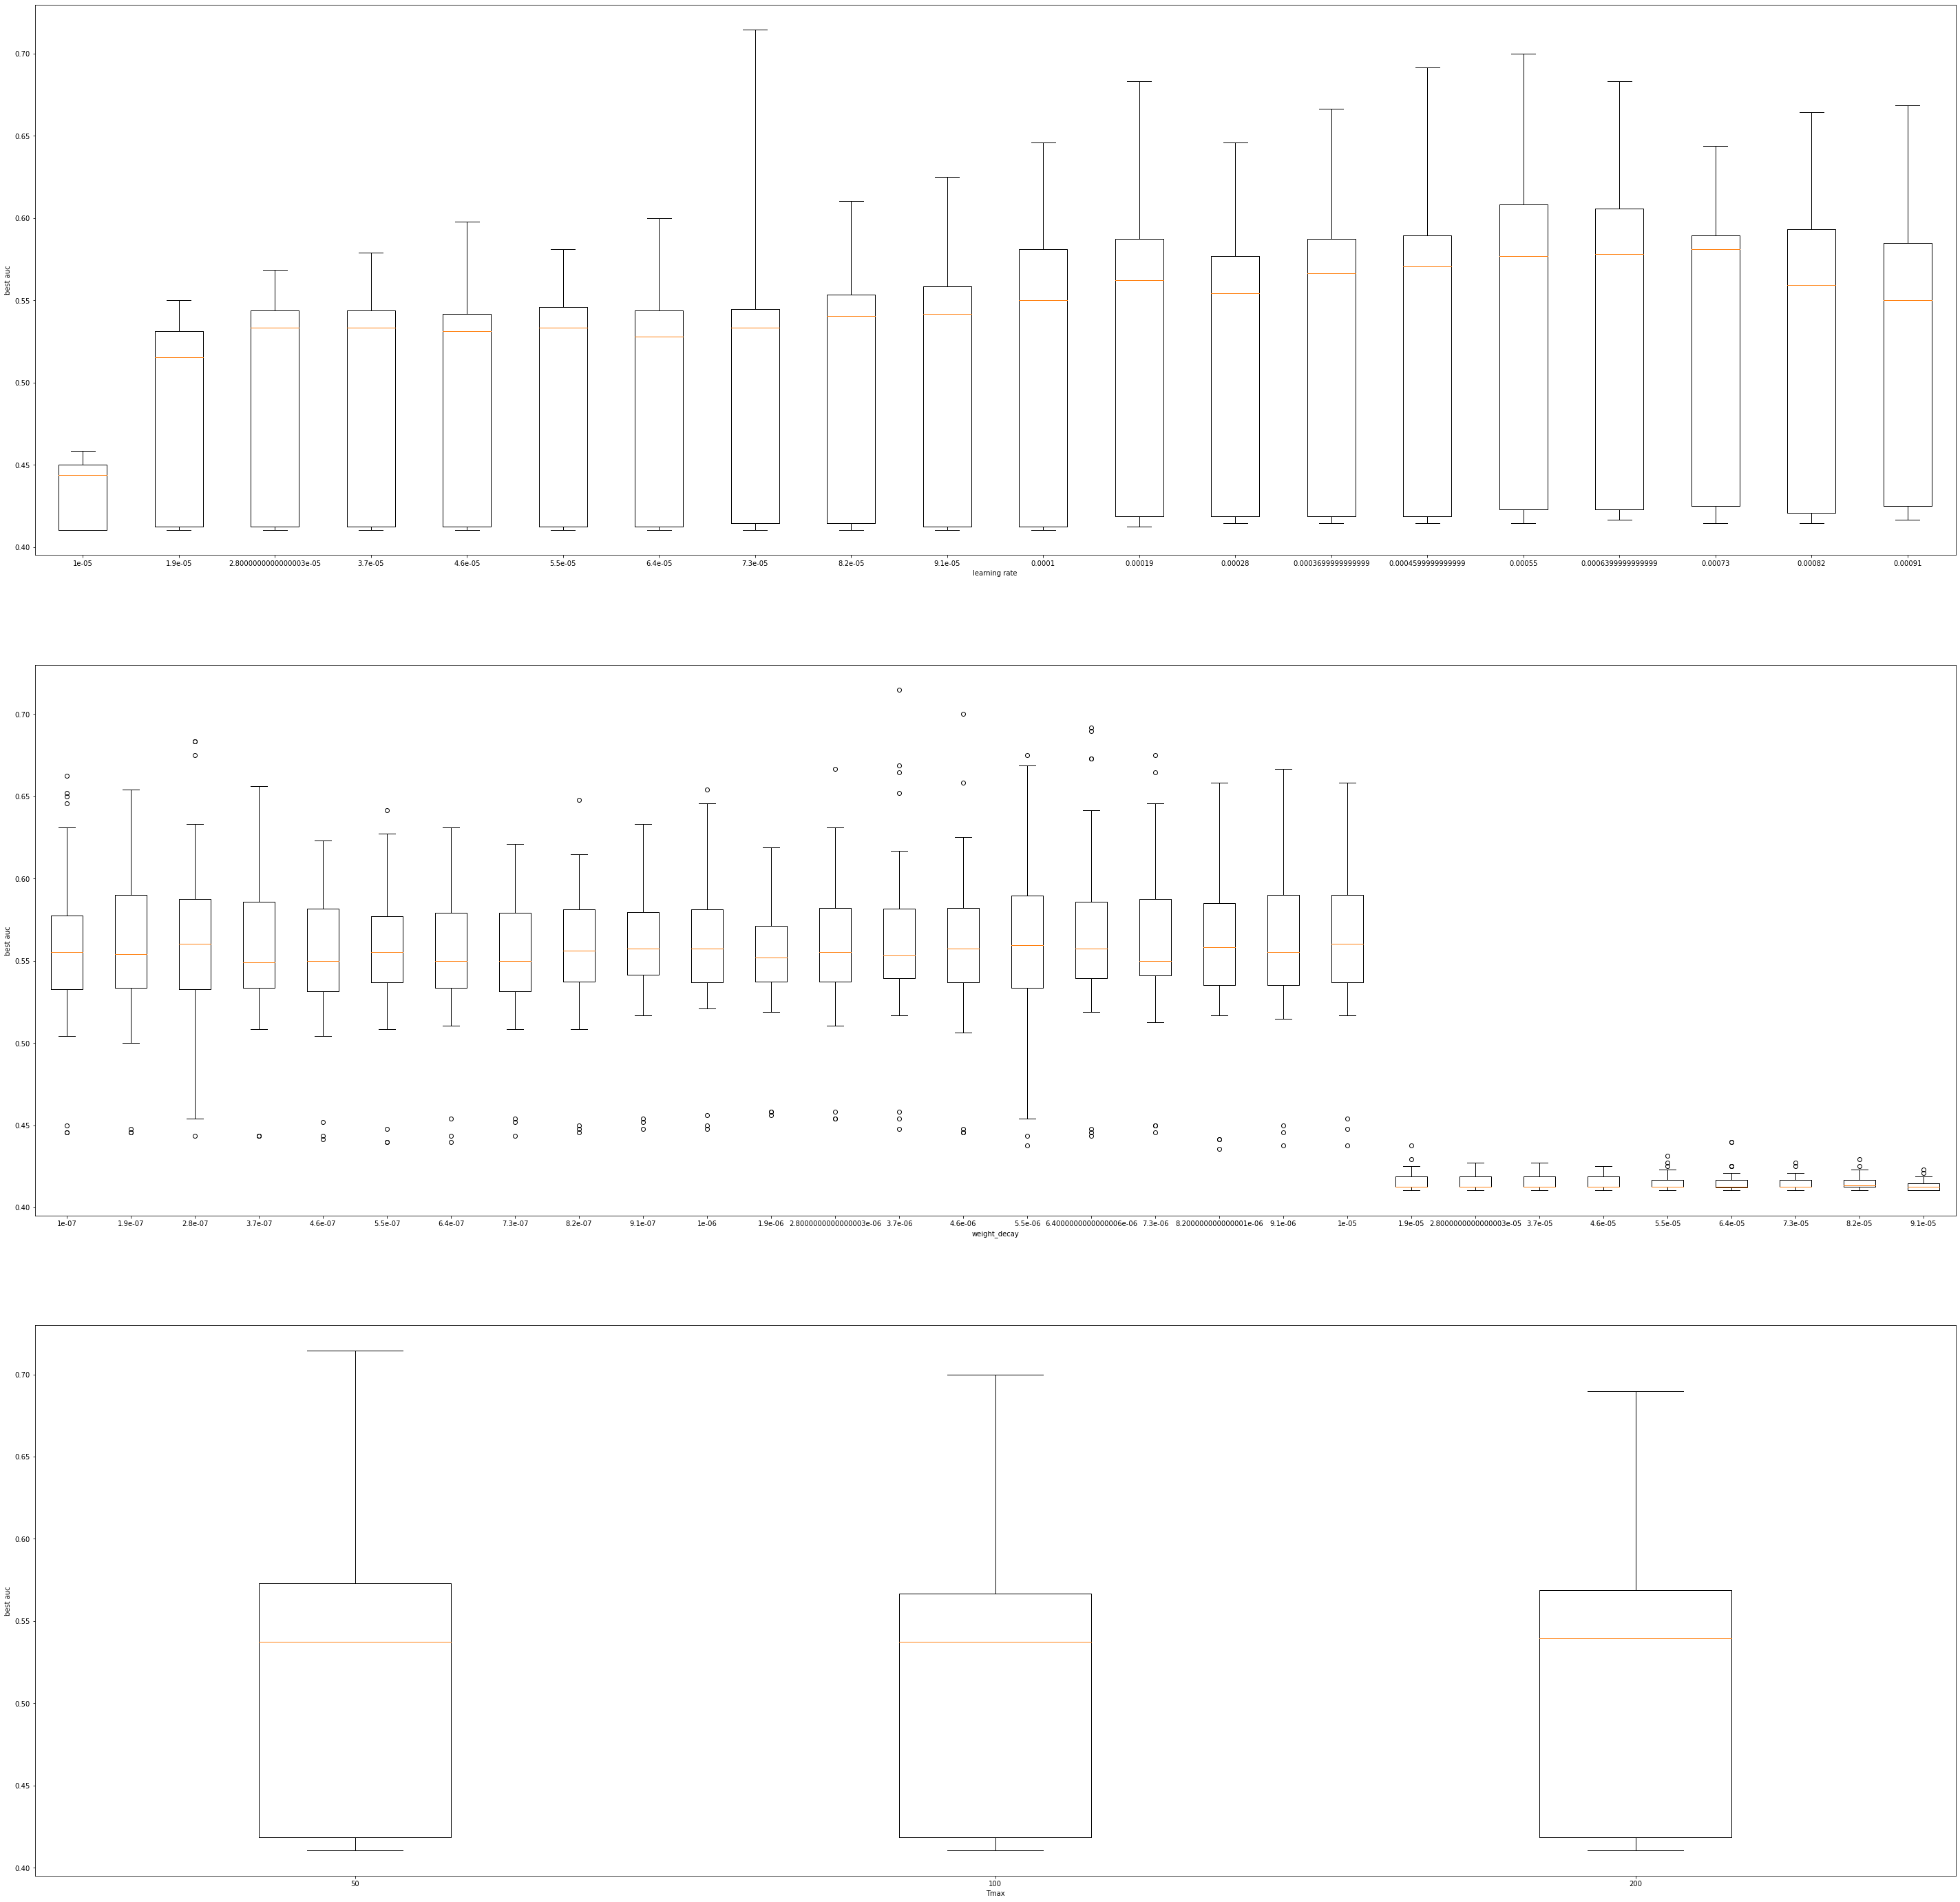

In [88]:
vis_best_metrics(result, "best auc")

count    1800.000000
mean        0.898358
std         0.045206
min         0.801545
25%         0.855460
50%         0.910740
75%         0.928161
max         1.084339
Name: best score, dtype: float64


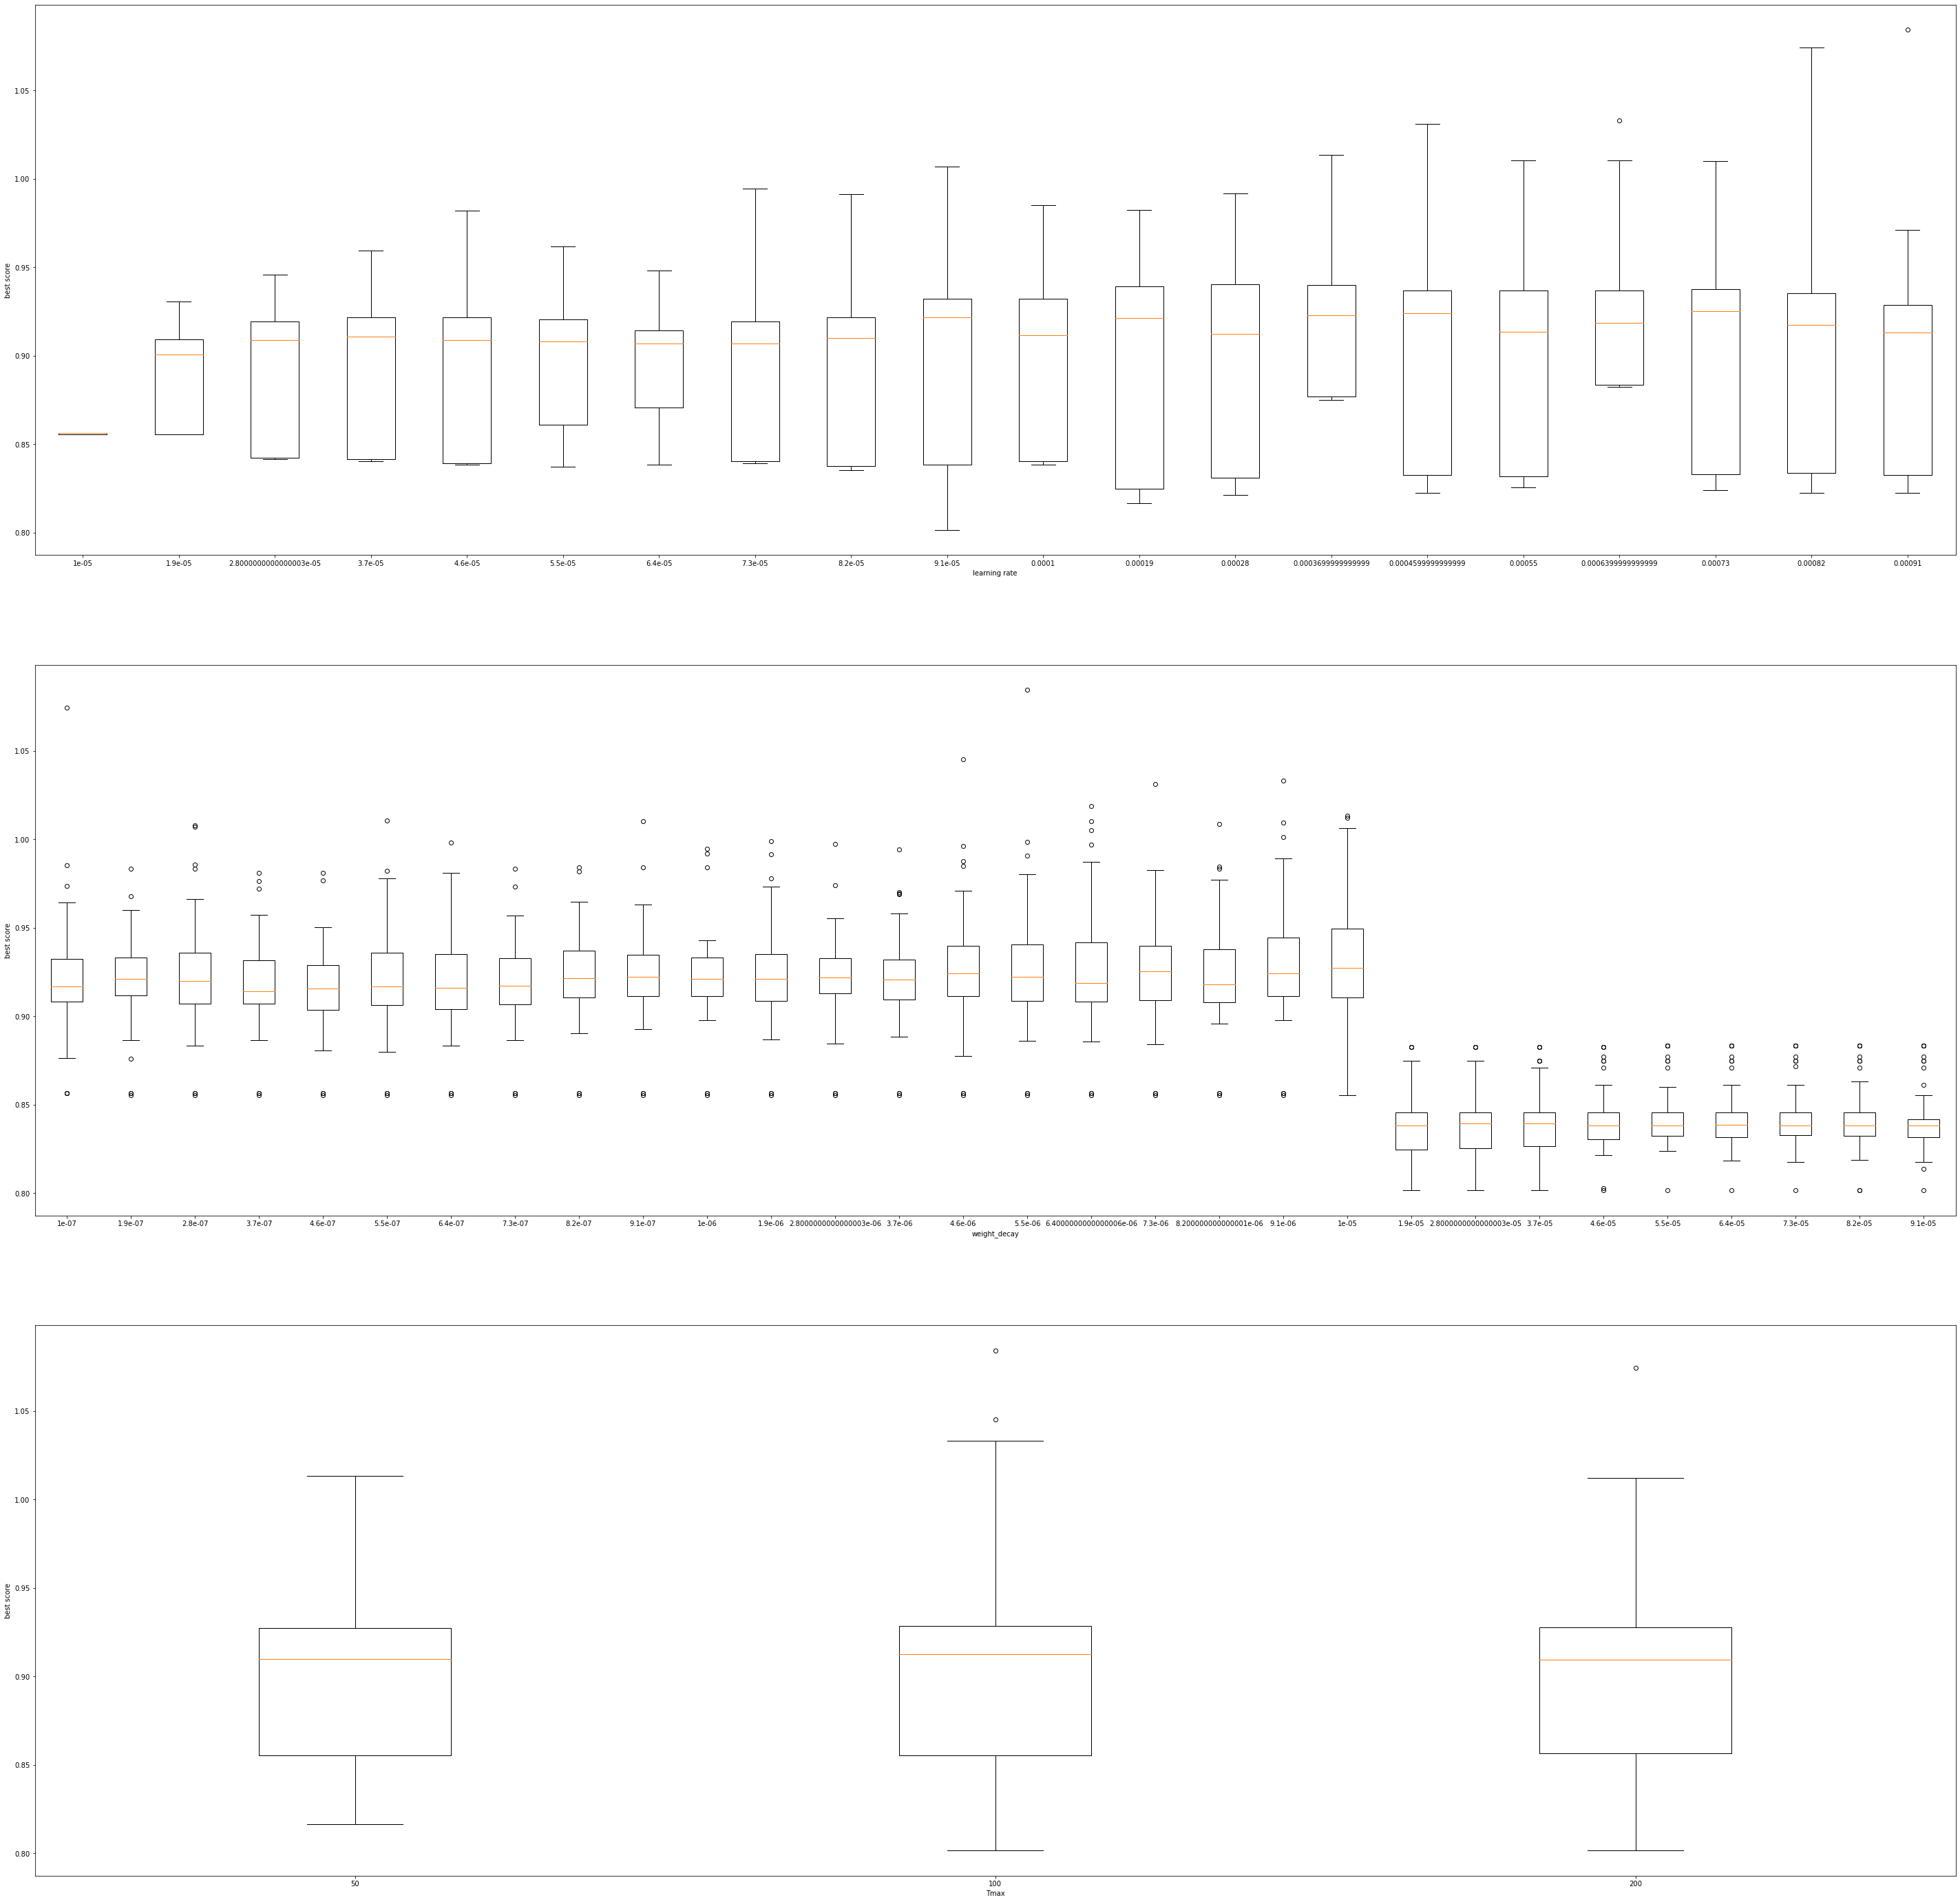

In [93]:
vis_best_metrics(result, "best score")

## summary of 1st trial：
lr：6.4e-5 ~ 8.2e-5 ,1e-4 ~2.8e-4, 4.5e-4 ~ 4.3e-4, 1e-3~1e-2

weight_decay 1e-6 ~ 1e-5相差不大,1e-7~4.6e-7, 2.8e-6~ 6.4e-6, 8.2e-6 ~ 1e-5,

Tmax: 50

# results of 2nd trial

In [100]:
result2 = pd.read_csv("./mil classifier/results_2.txt", header=None)
result2.columns = [
    "learning rate",
    "weight_decay",
    "Tmax",
    "best score",
    "best auc",
    "best avg auc",
]

count    1200.000000
mean        0.573924
std         0.041578
min         0.431250
25%         0.543750
50%         0.564583
75%         0.597917
max         0.747917
Name: best auc, dtype: float64


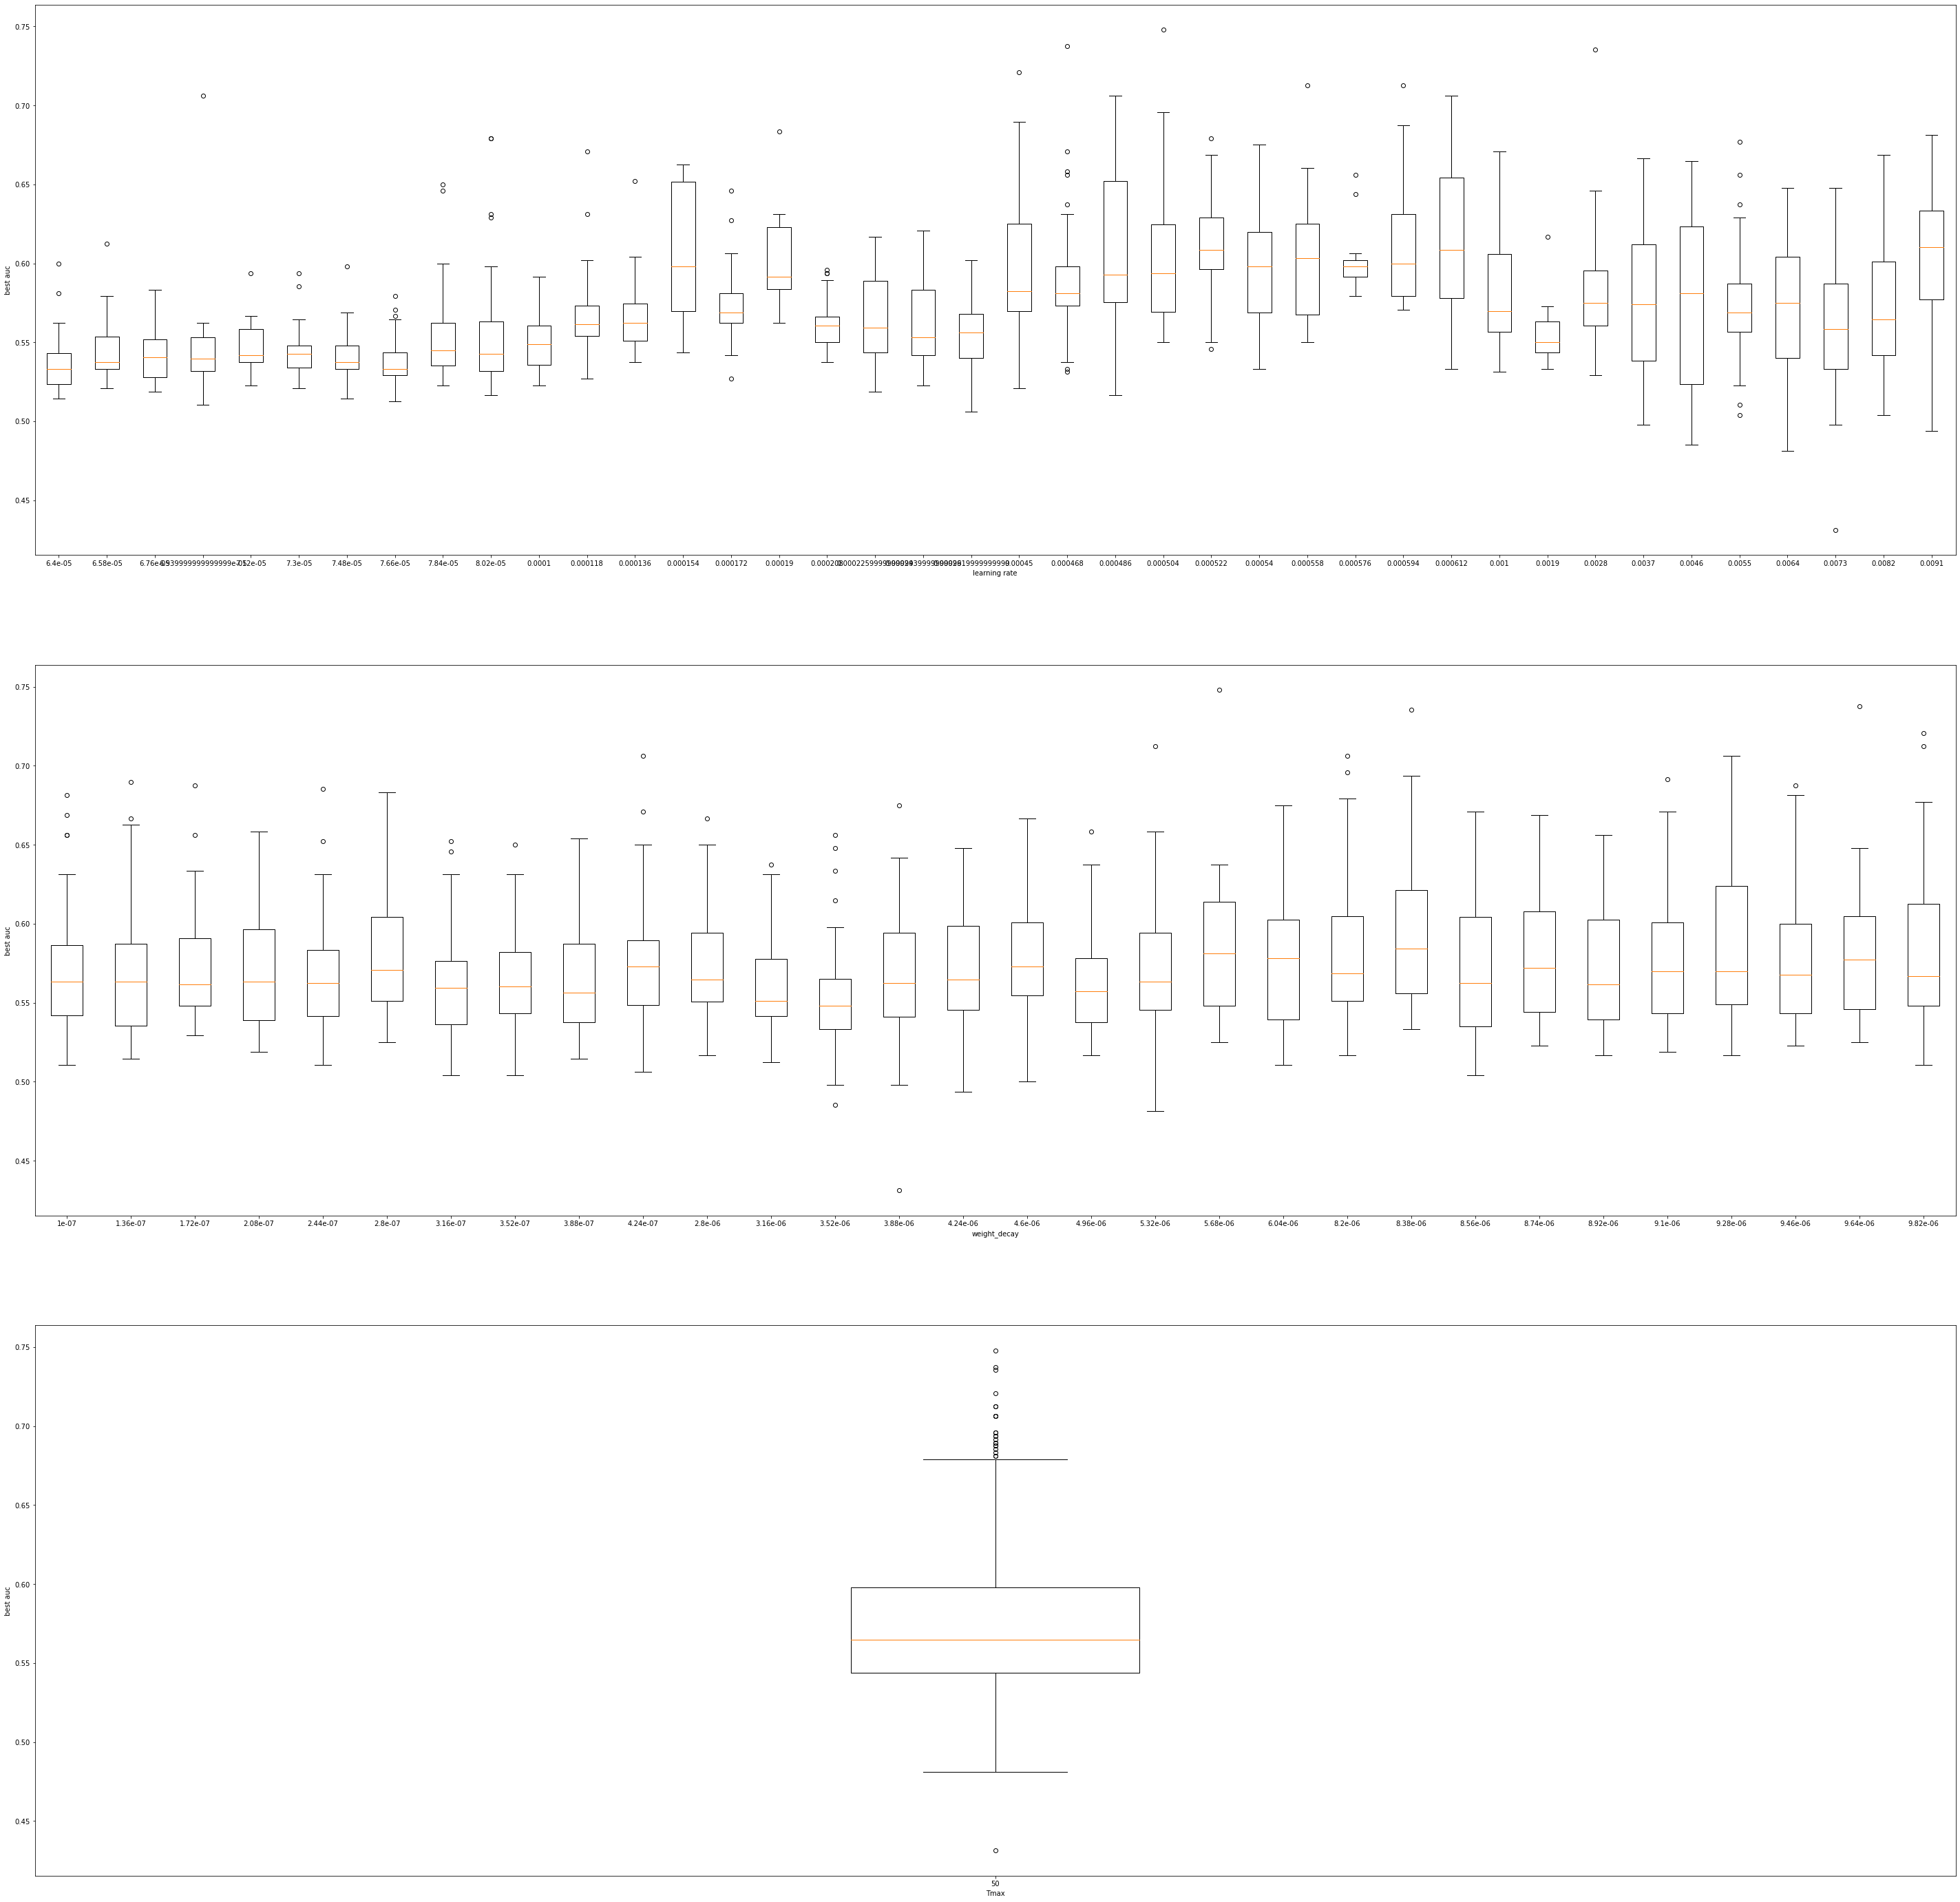

In [101]:
vis_best_metrics(result2, "best auc")

count    1200.000000
mean        0.938442
std         0.037937
min         0.833585
25%         0.914152
50%         0.929490
75%         0.952344
max         1.134339
Name: best score, dtype: float64


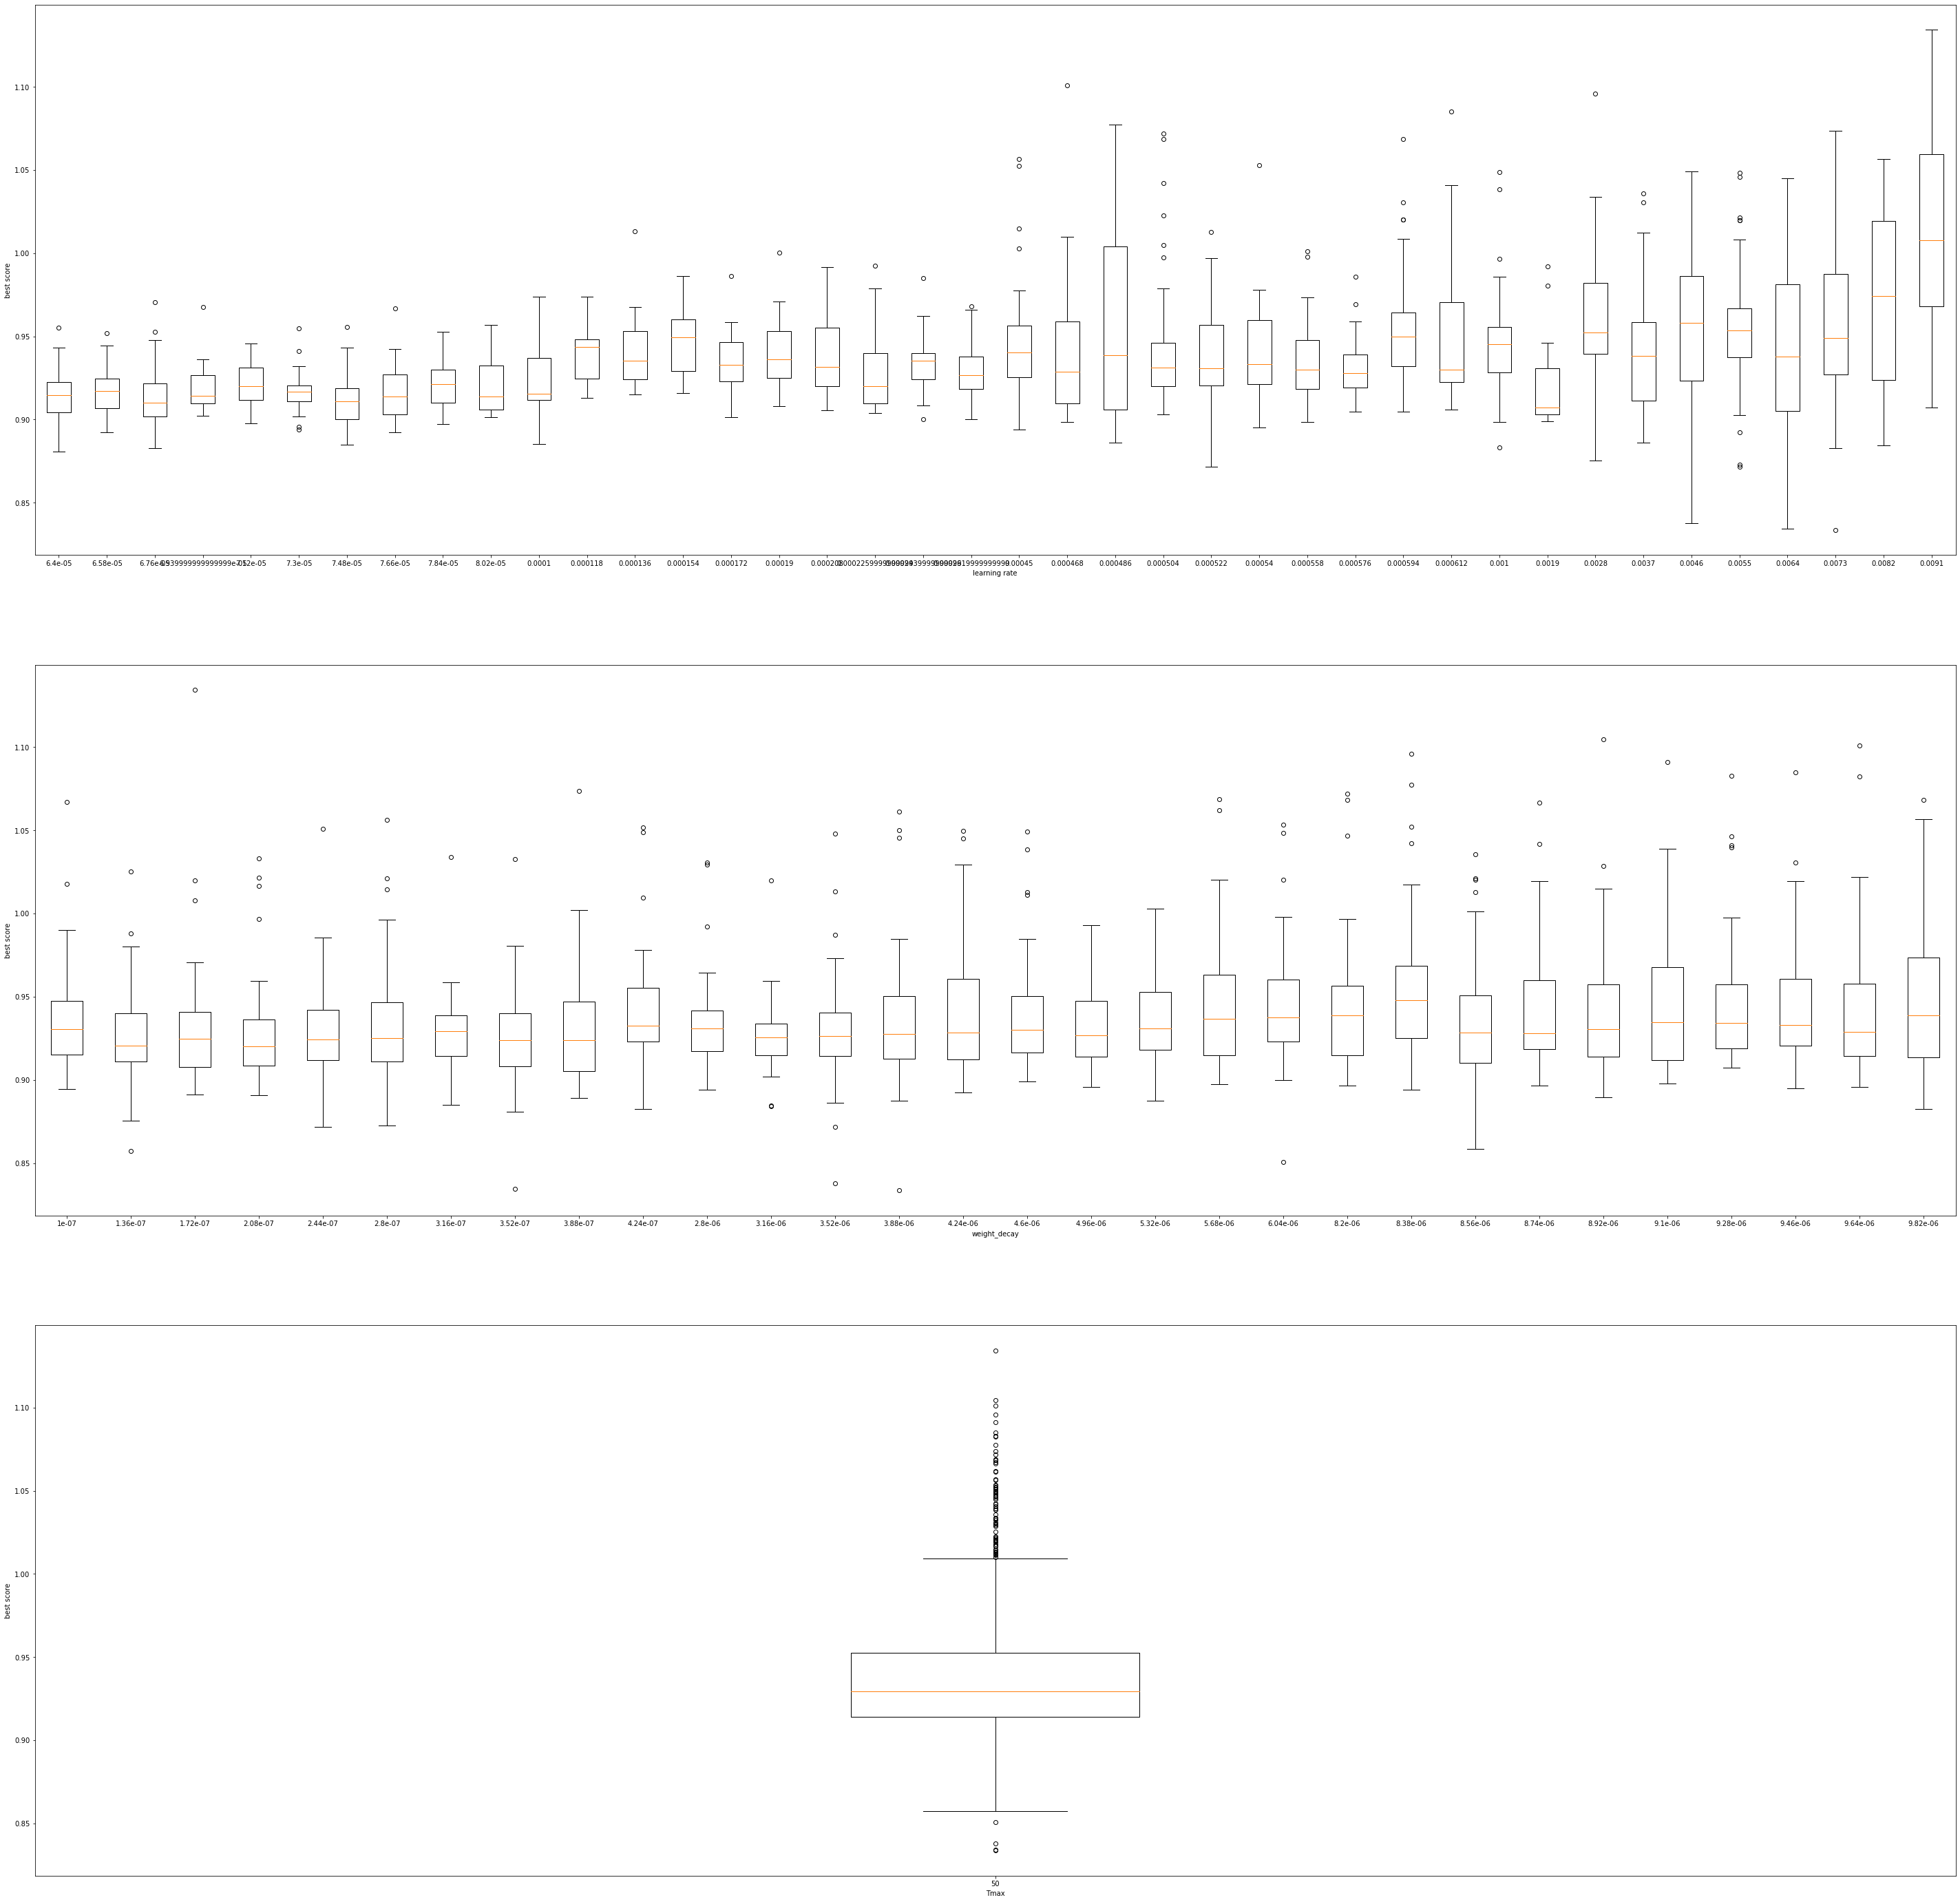

In [102]:
vis_best_metrics(result2, "best score")

## summary of 2nd trial:

lr:(4e-4,5.2e-4)(8.2e-3,0.015)(5.5e-4,6.1-4)(1.9e-3,3.7e-3)

wd:(5.32e-6,8.38e-6)(9.3e-6,9.9-e6)(8.74e-6,9.1e-6)(1.36e-7,2.08e-7)

# results of 3rd trial

In [107]:
result3 = pd.read_csv("./mil classifier/results_3.txt", header=None)
result3.columns = [
    "learning rate",
    "weight_decay",
    "Tmax",
    "best score",
    "best auc",
    "best avg auc",
]

count    4000.000000
mean        0.621203
std         0.064737
min         0.431250
25%         0.564583
50%         0.612500
75%         0.670833
max         0.837500
Name: best auc, dtype: float64


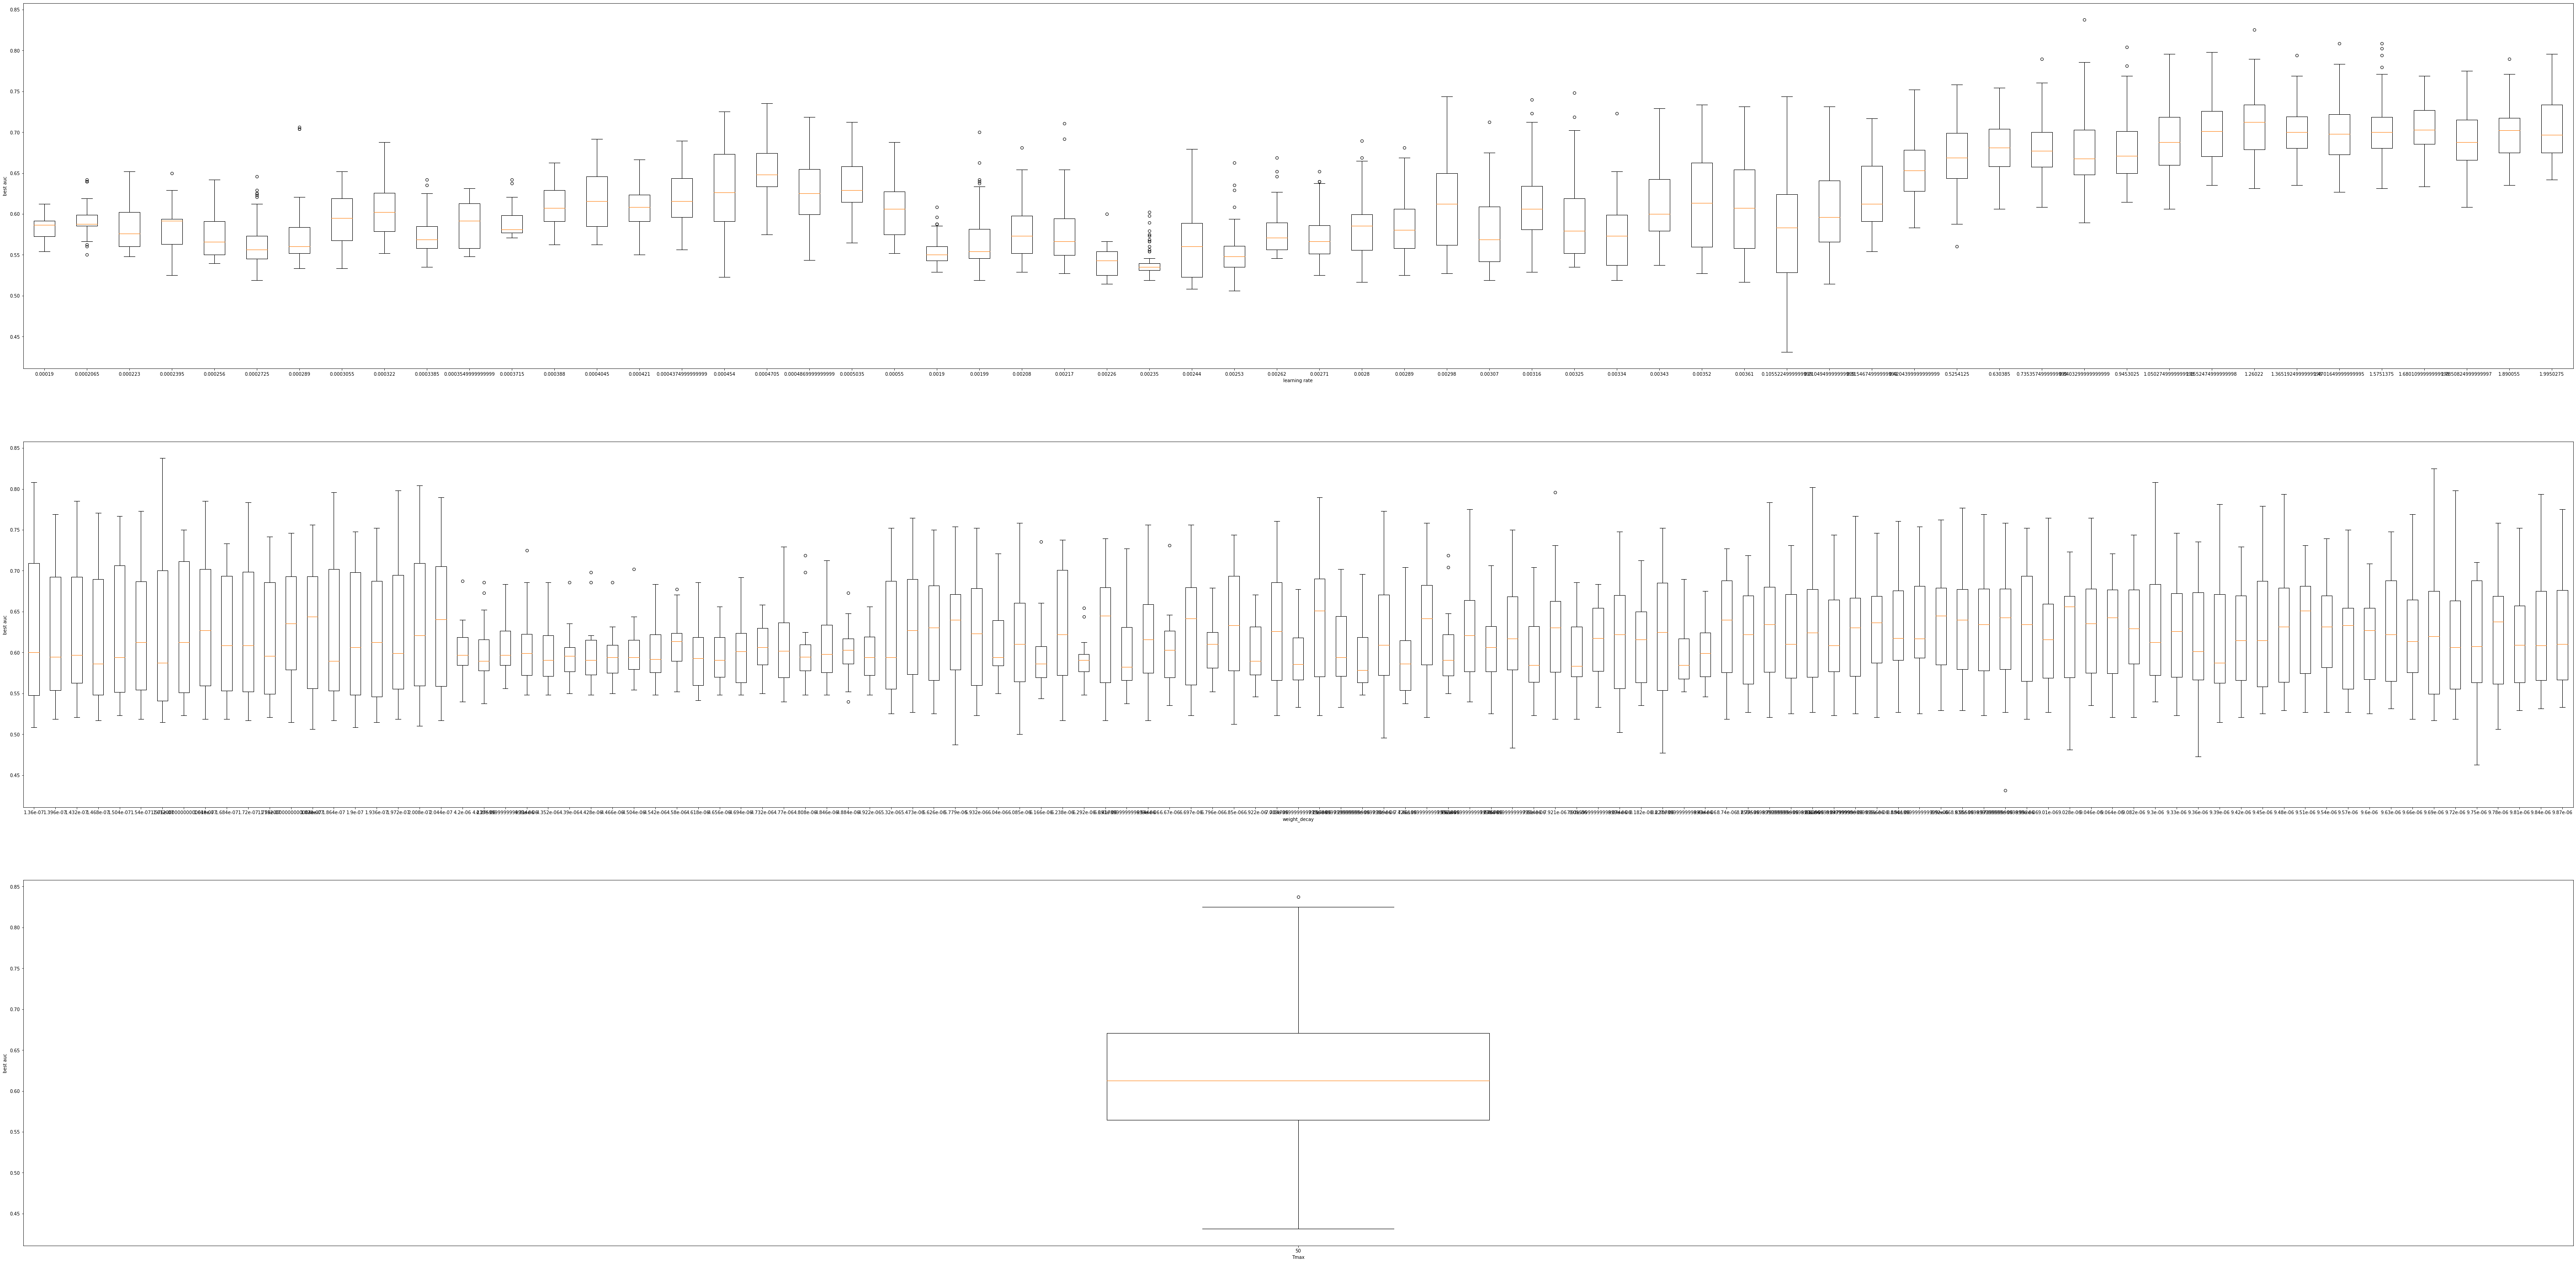

In [108]:
vis_best_metrics(result3, "best auc")

count    4000.000000
mean        0.989603
std         0.066747
min         0.852011
25%         0.933261
50%         0.978341
75%         1.045501
max         1.210381
Name: best score, dtype: float64


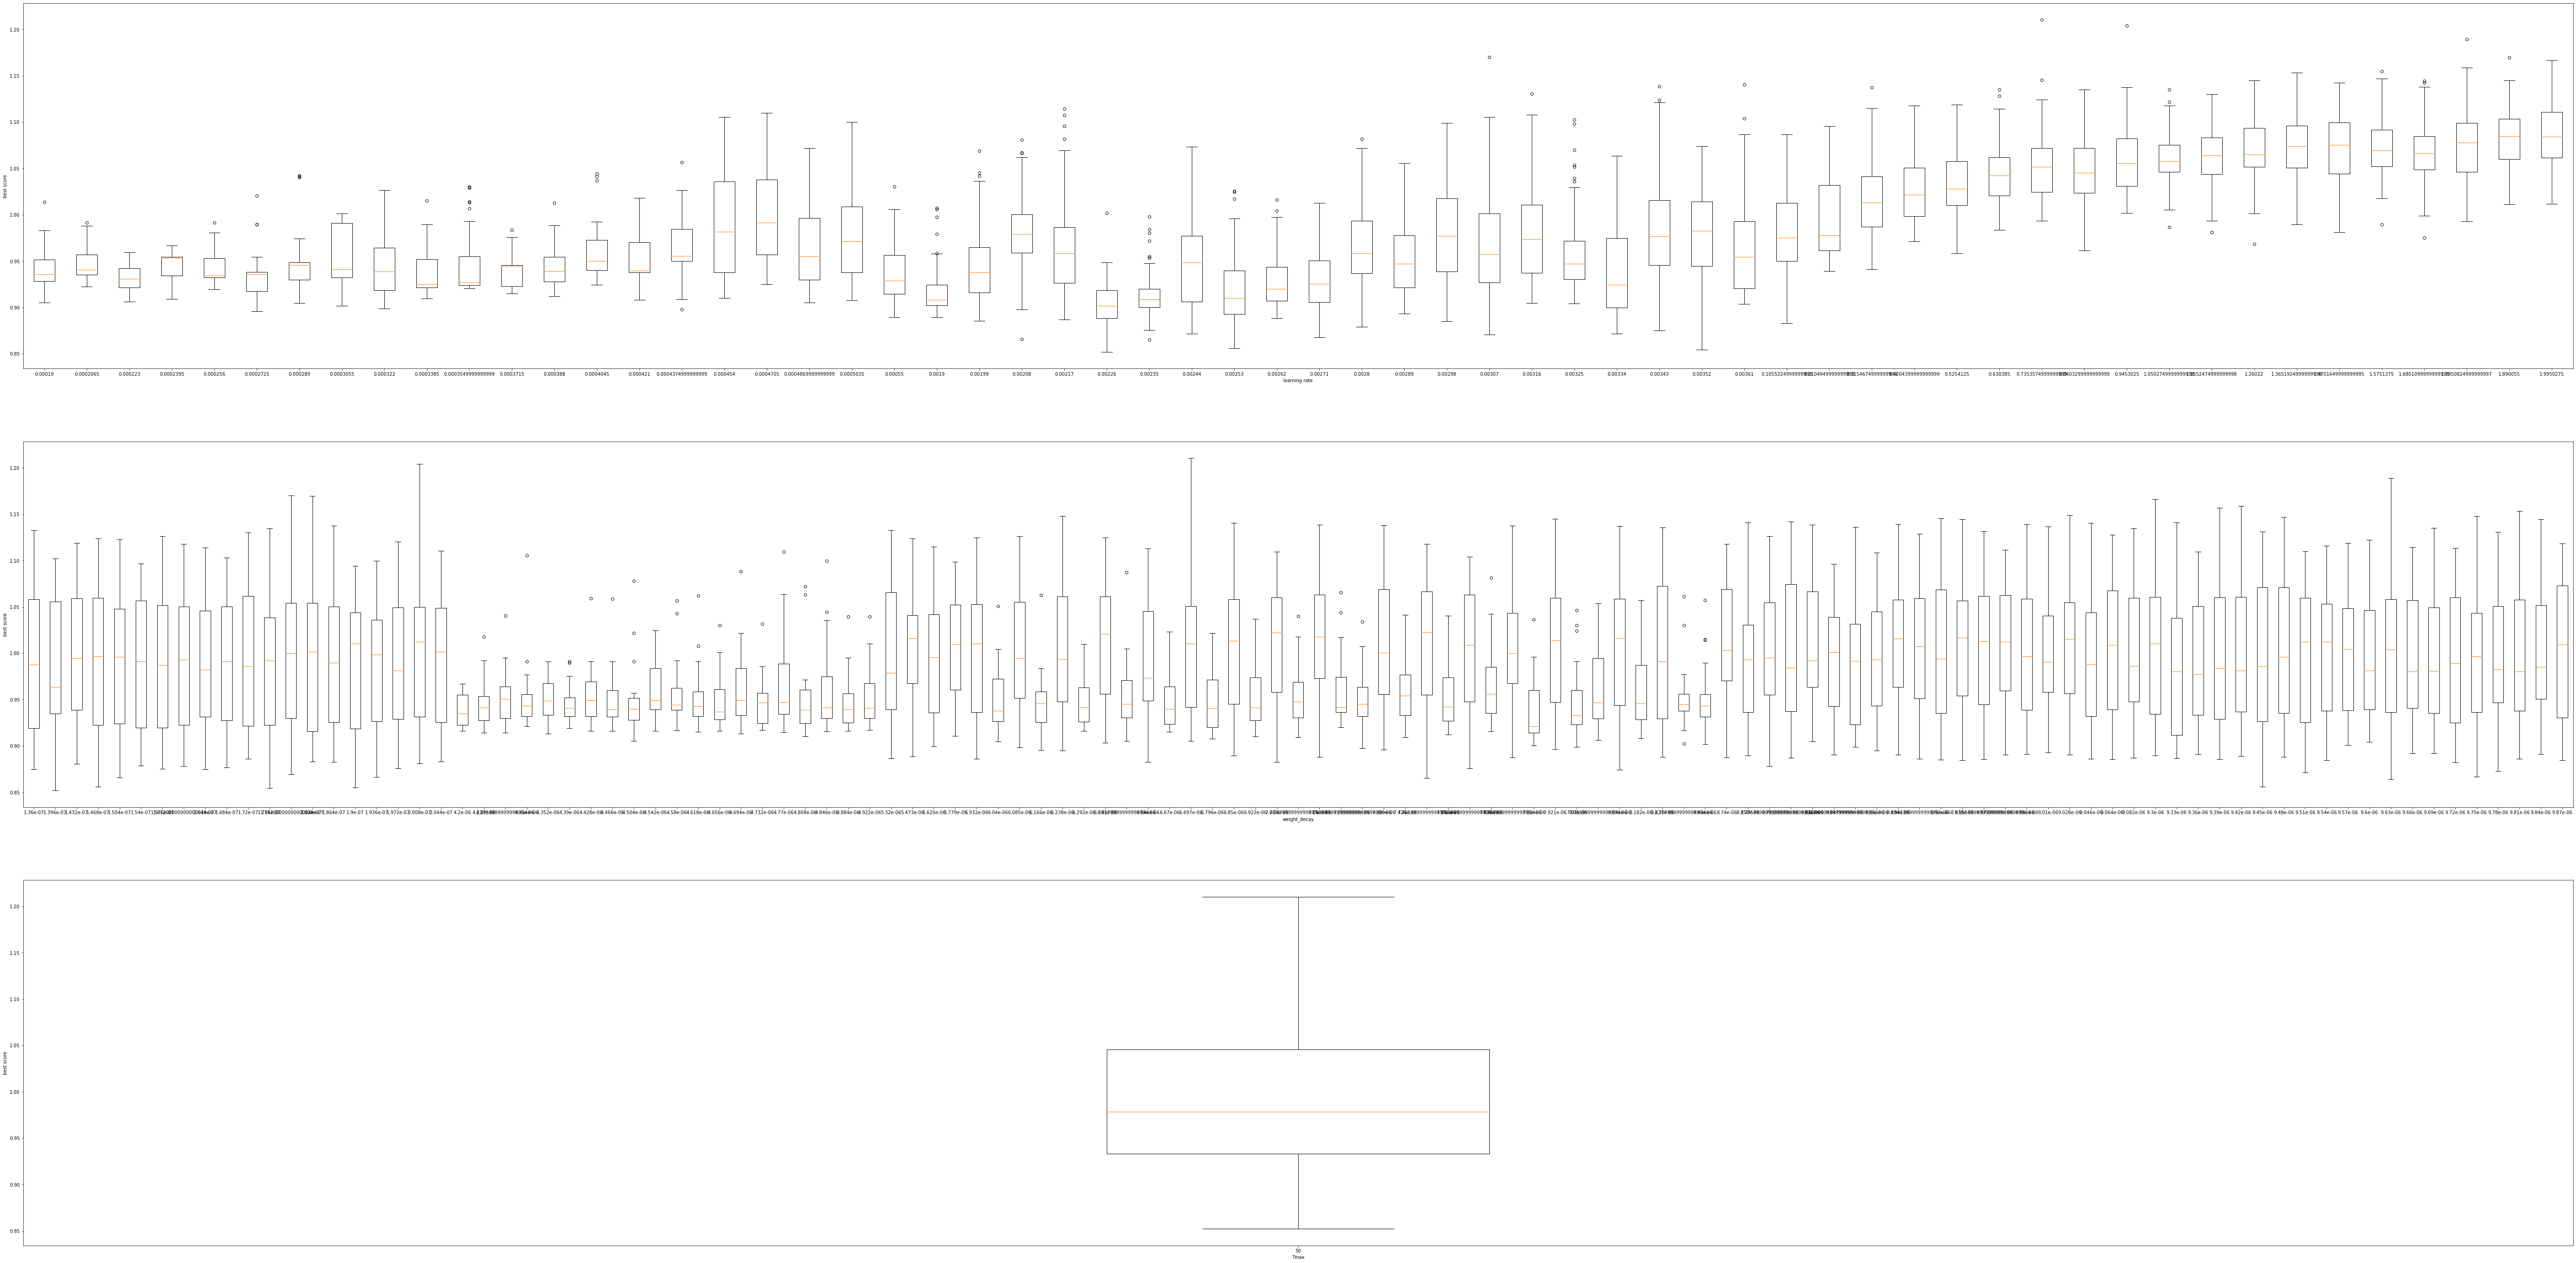

In [109]:
vis_best_metrics(result3, "best score")

## summary of trial 3
lr:

In [115]:
result_ser_3 = pd.read_csv("./mil classifier/results_3.txt", header=None)
result_ser_3.columns = [
    "learning rate",
    "weight_decay",
    "Tmax",
    "best score",
    "best auc",
    "best avg auc",
]
result_star_3 = pd.read_csv("./mil classifier/results_star_3.txt", header=None)
result_star_3.columns = [
    "learning rate",
    "weight_decay",
    "Tmax",
    "best score",
    "best auc",
    "best avg auc",
]
result3 = pd.concat([result_ser_3, result_star_3])

count    7200.000000
mean        0.612684
std         0.061702
min         0.422917
25%         0.566667
50%         0.604167
75%         0.656250
max         0.837500
Name: best auc, dtype: float64


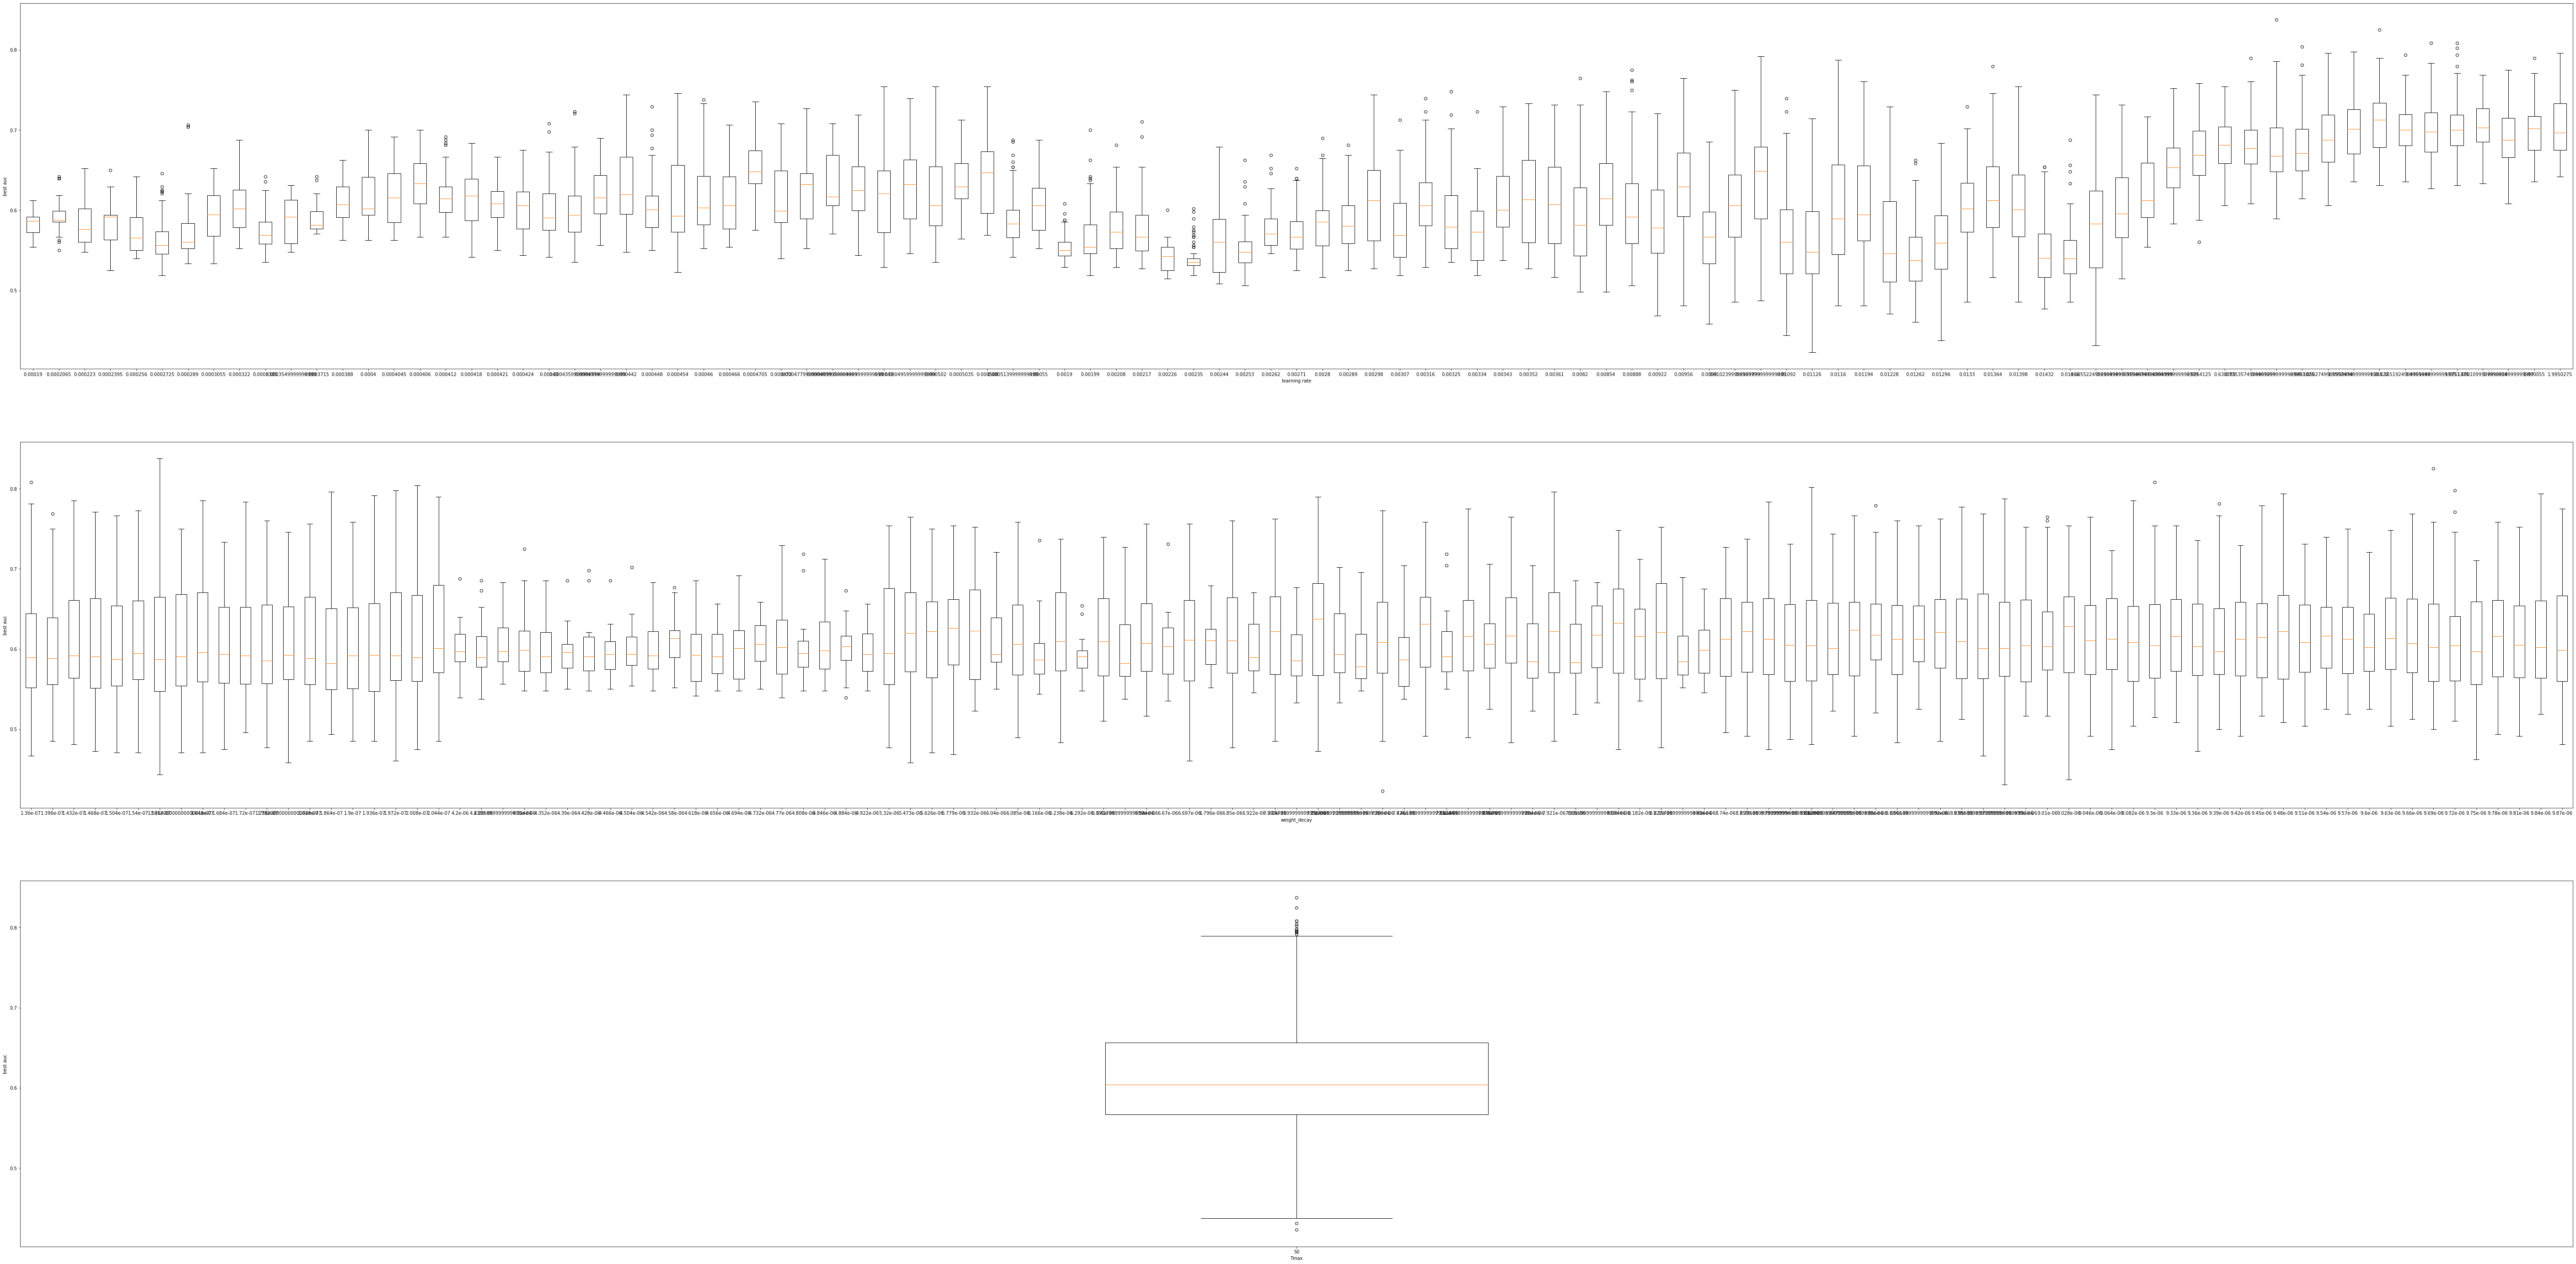

In [116]:
vis_best_metrics(result3,'best auc')

count    7200.000000
mean        0.982359
std         0.062444
min         0.813757
25%         0.933369
50%         0.968409
75%         1.028942
max         1.221839
Name: best score, dtype: float64


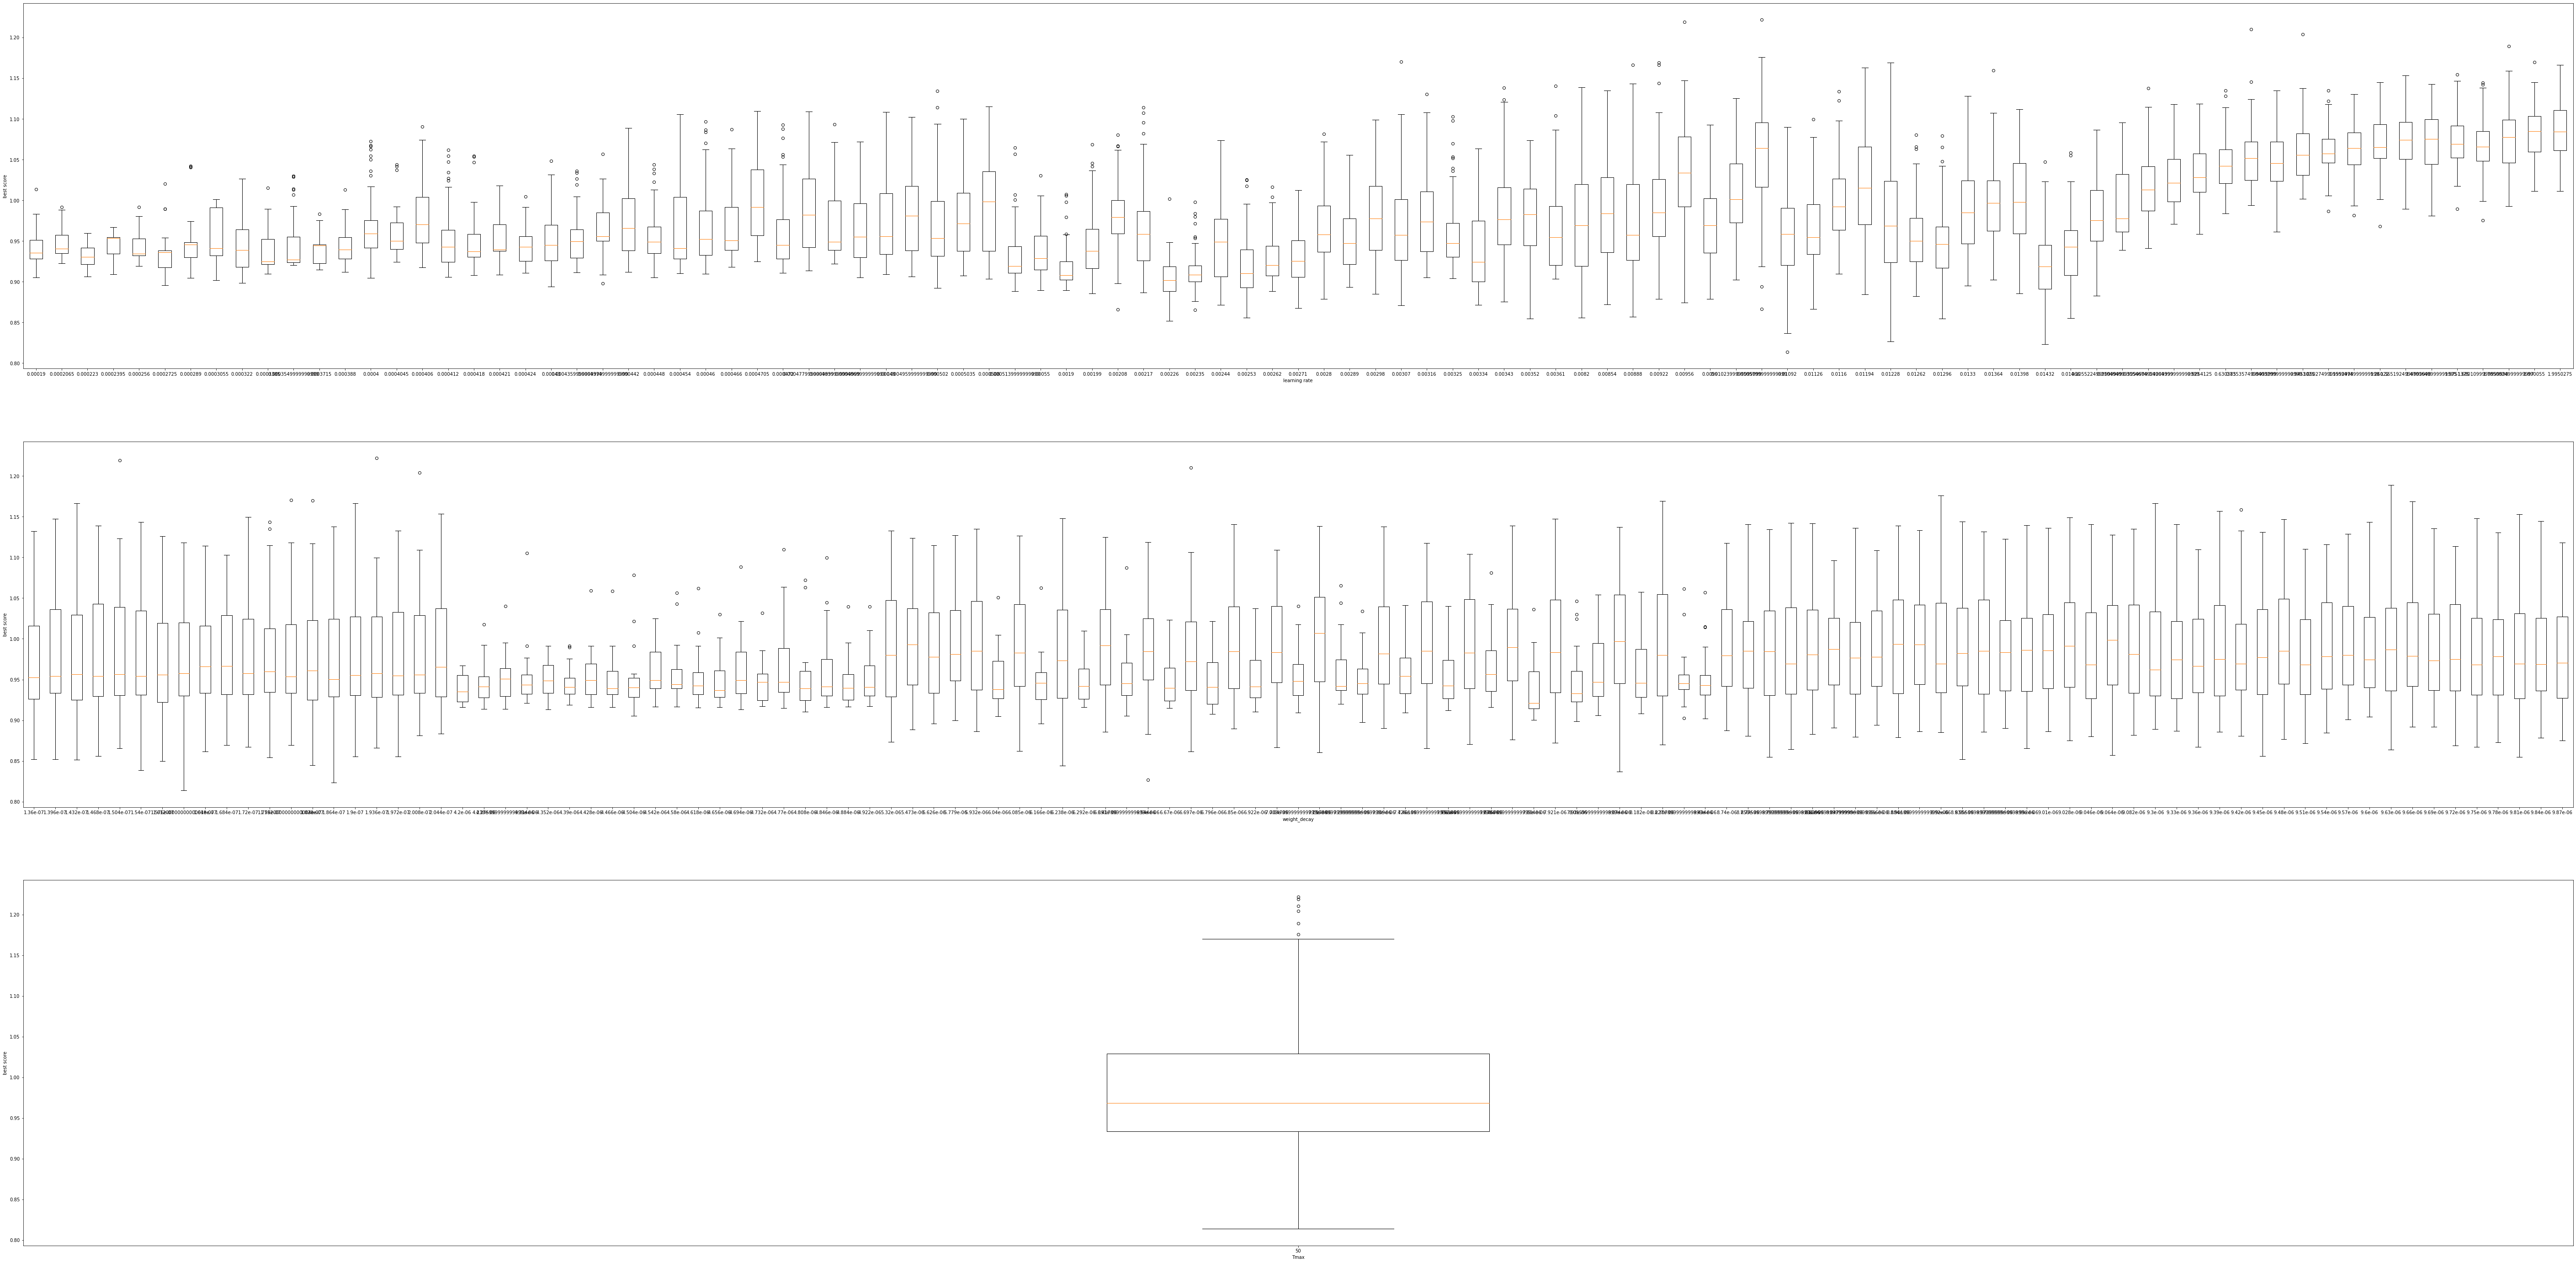

In [117]:
vis_best_metrics(result3,'best score')

2023-5-13 **changed path of result file**: 

packed in './mil processing/hyperparam_select_batch_{run}/' folder

# results of 1st trial with pretrained resnet, 4th run

count    600.000000
mean       0.691847
std        0.080112
min        0.452083
25%        0.650000
50%        0.704167
75%        0.756250
max        0.845833
Name: best auc, dtype: float64


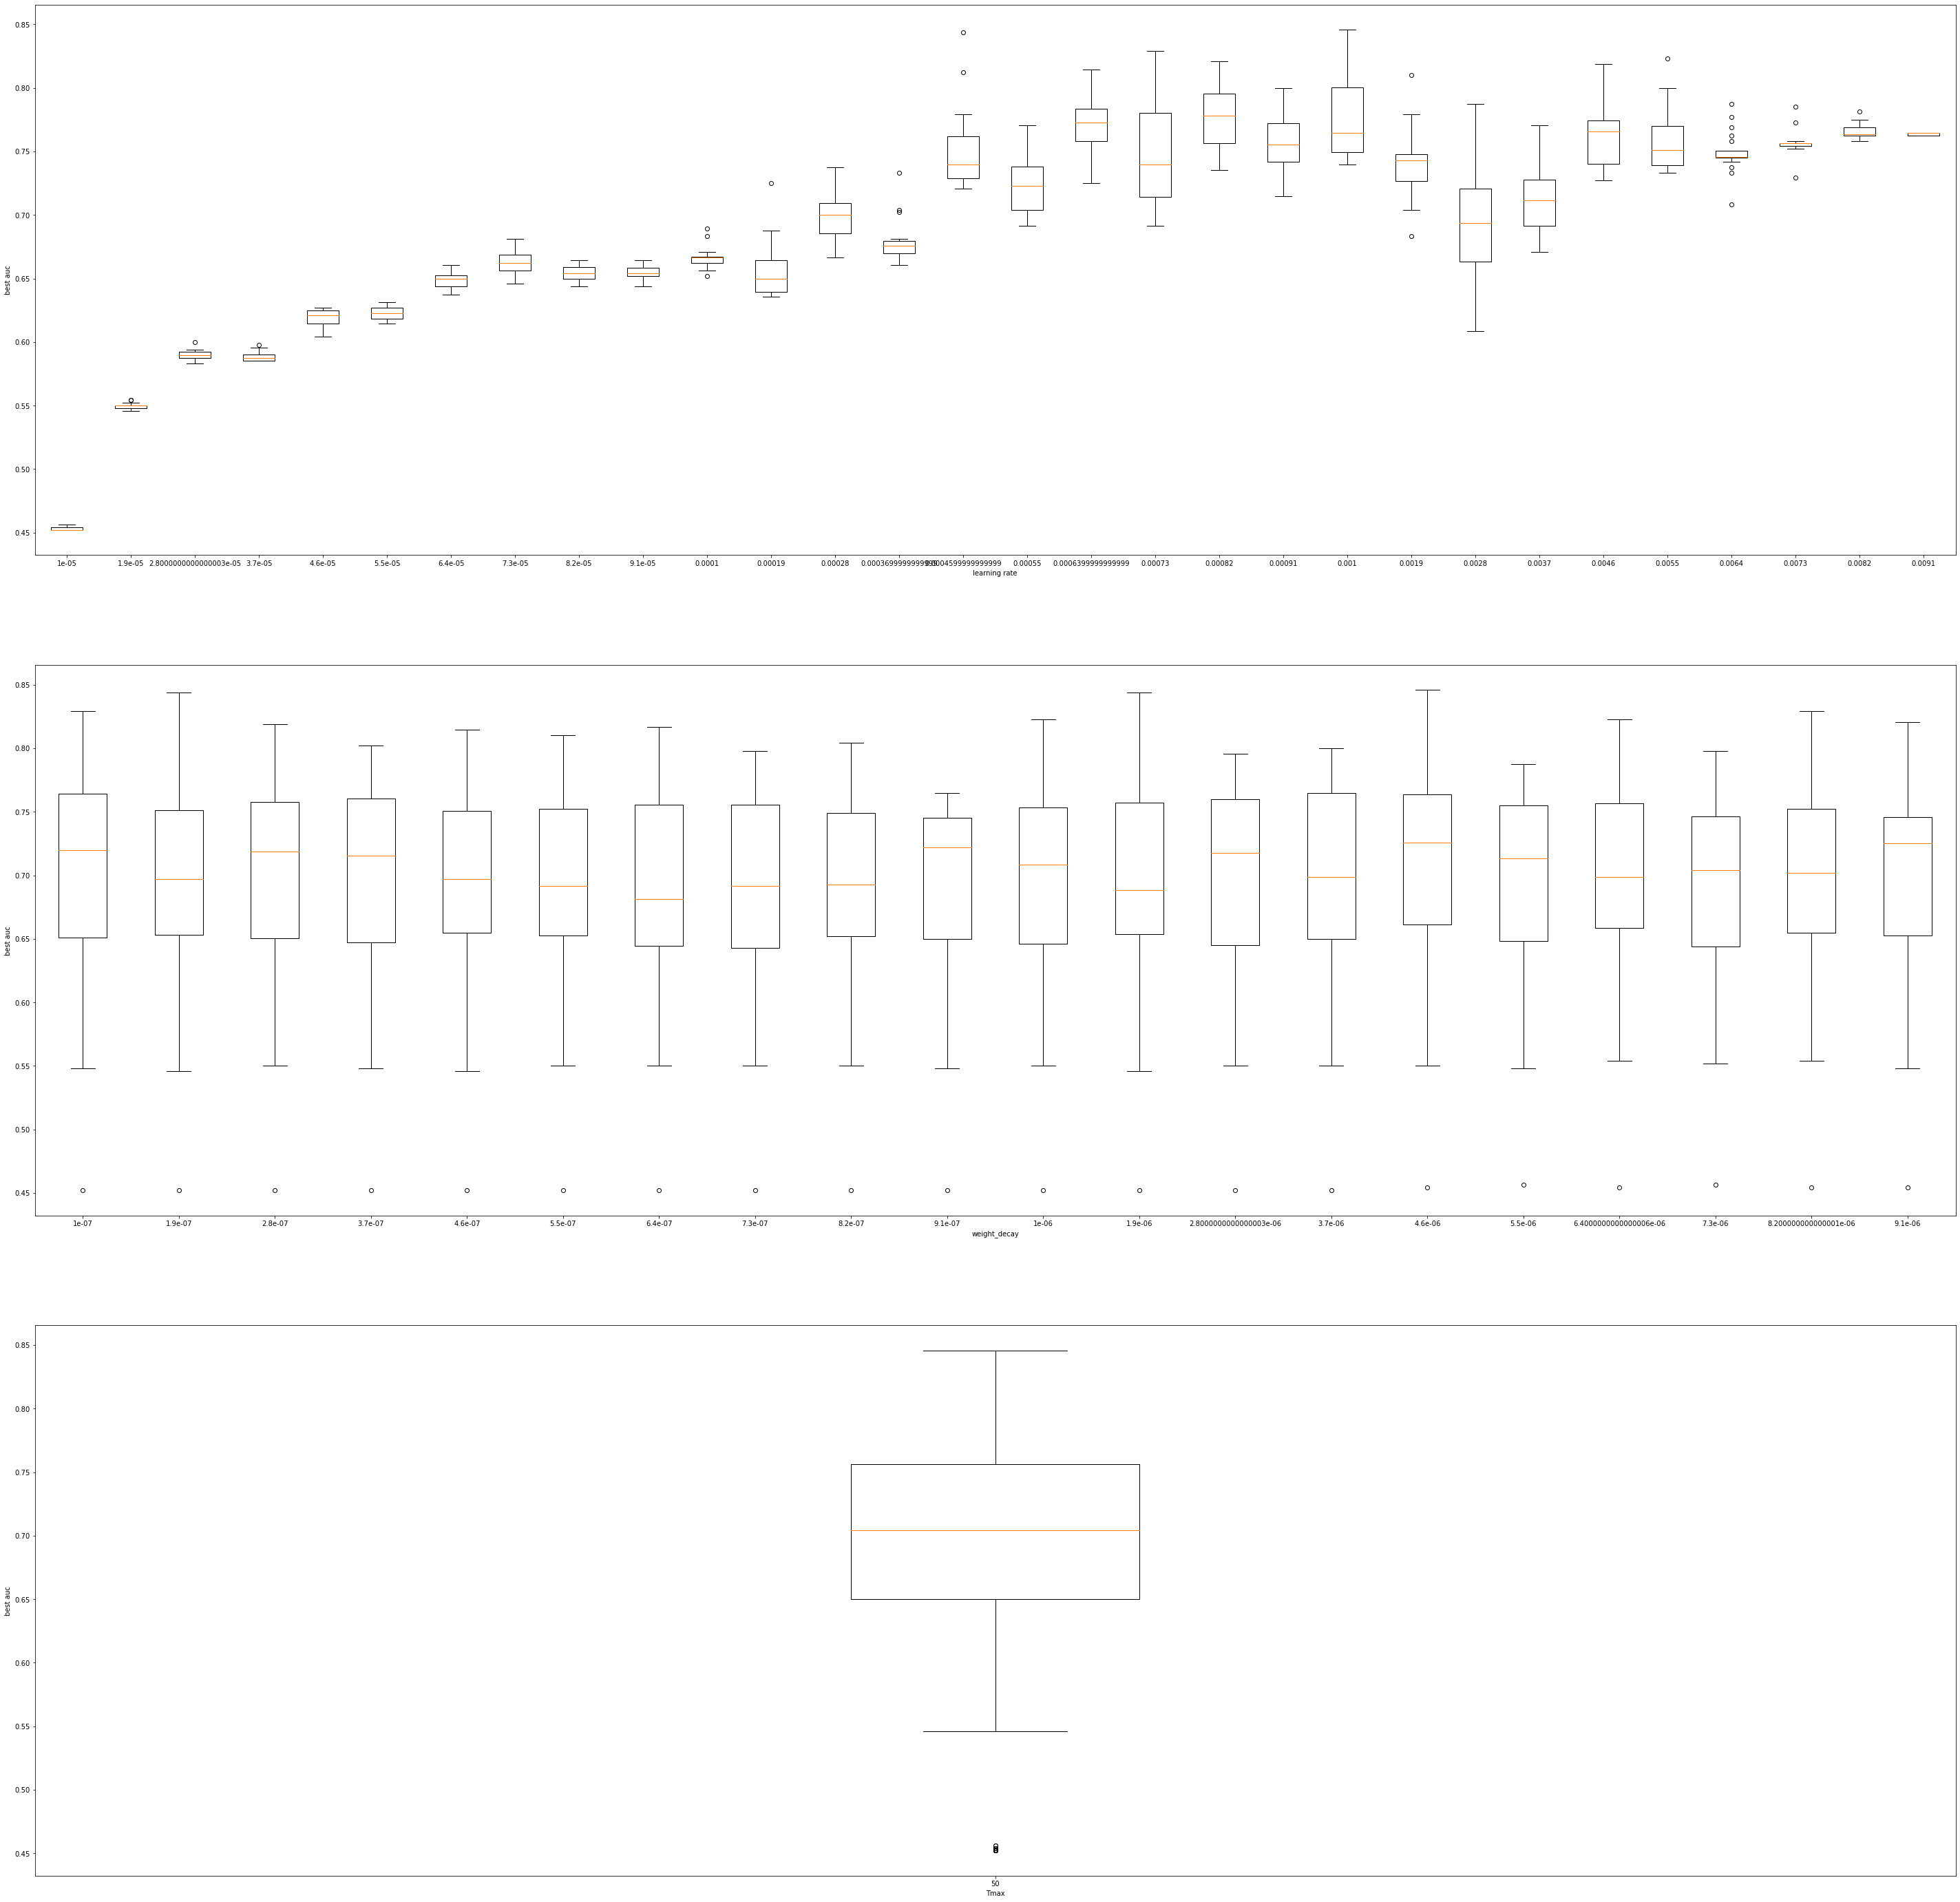

In [146]:
result4 = reader('./mil classifier/hyperparam_select_batch_4')
vis_best_metrics(result4,'best auc',figsize = (50,50),output=True)

count    600.000000
mean       1.099046
std        0.056764
min        0.918139
25%        1.070564
50%        1.094253
75%        1.133630
max        1.248922
Name: best score, dtype: float64


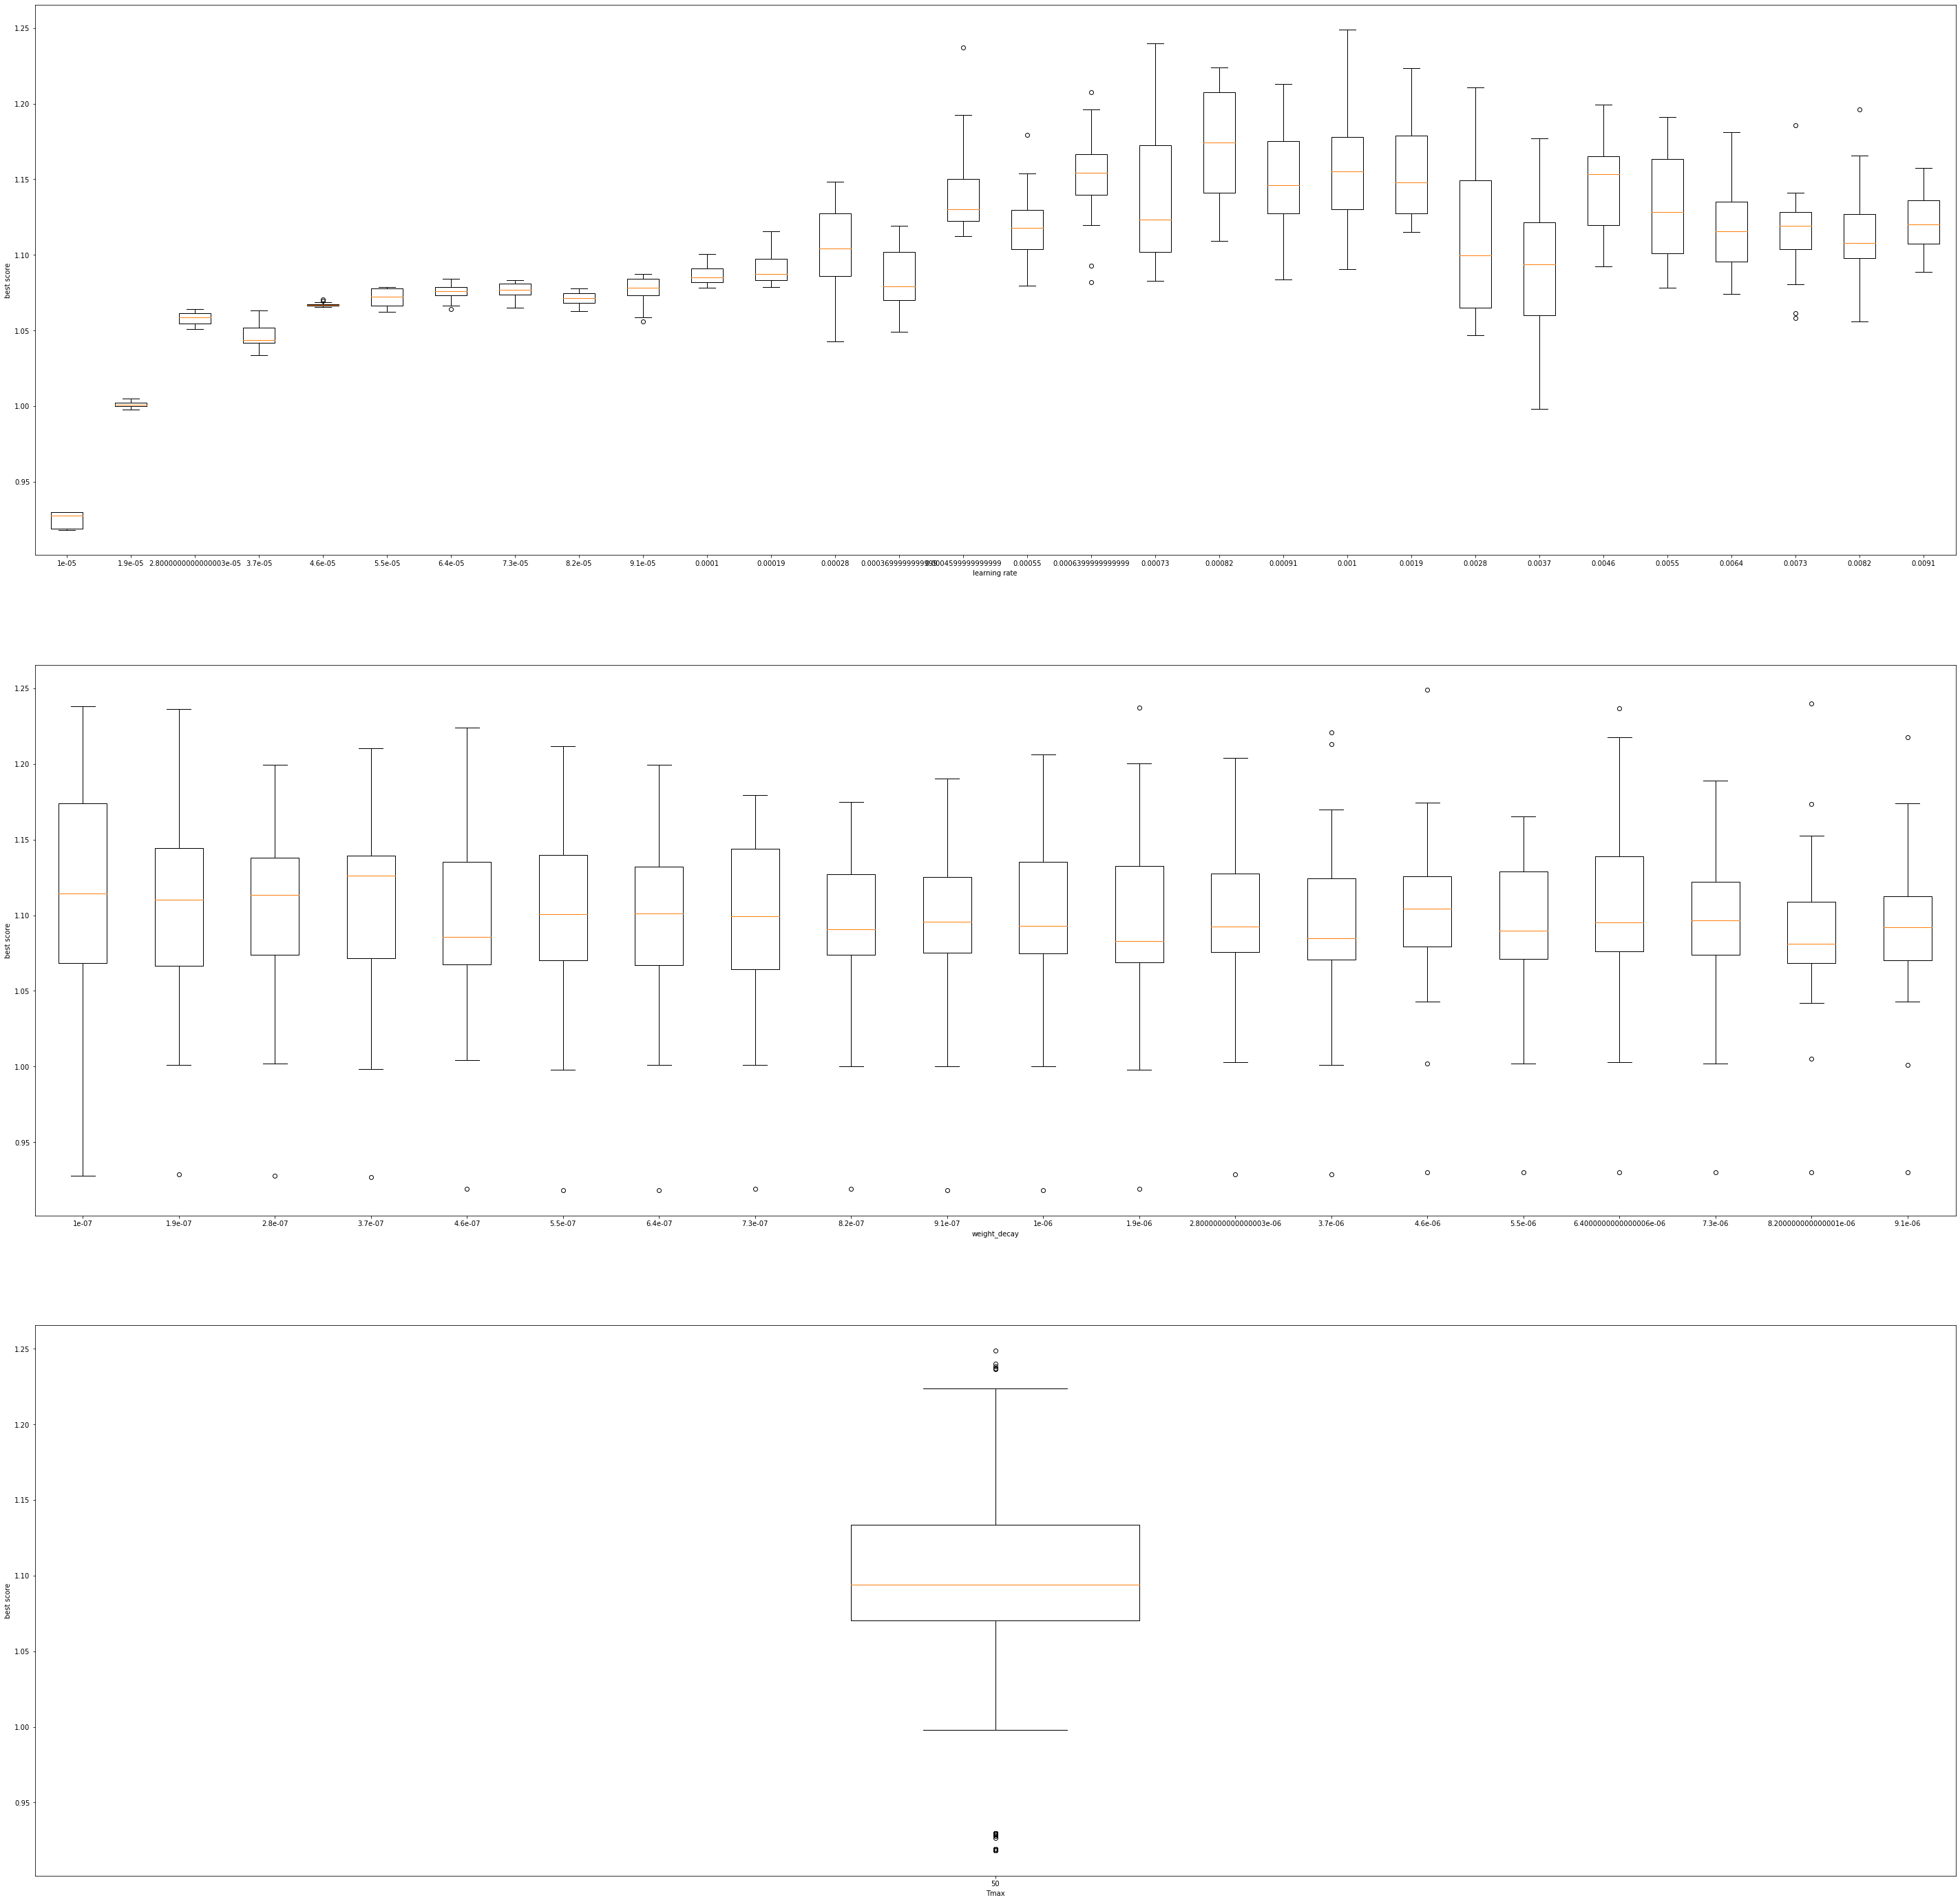

In [145]:
vis_best_metrics(result4,'best score',figsize=(50,50),output = True)

## summary of 1st trial with pretrained resnet18, 4th run

lr: (4e-4,1e-3)

wd:对结果影响不敏感，沿用上述

Tmax：根据run1，沿用50